In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from myLibraries.events import *
from myLibraries.queries import *
from myLibraries.theoretical_functions import *

In [111]:
# focal_control.csv contains 13614 authors, but only 5459 of are the the collaboration.csv
# of those 5459 there are only 2910 focal+control couples 
# The "start_year" indicated in the focal_control.csv doesen't match the one in publication data

# ISSUE: there are authors with collaborations preceeding their first collaboration (vedi id=55791277000)
df_pub = get_all_pubs()
print(df_pub[df_pub["ID"] == 55791277000])
df_coll = get_all_collabs()
print(df_coll[df_coll["ID"] == 55791277000])

                 ID  1990  1991  1992  1993  1994  1995  1996  1997  1998  \
166237  55791277000     0     0     0     0     0     0     0     0     0   

        ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  start_year  
166237  ...     0     0     0     2     6     1     2     4     0        2013  

[1 rows x 31 columns]
                 ID  1990  1991  1992  1993  1994  1995  1996  1997  1998  \
146761  55791277000     0     0     0     0     0     0     0     0     0   

        ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  start_year  
146761  ...     0     3     3     4     6     7    17    22    22        2013  

[1 rows x 31 columns]


# (1) **GRANTED and NOT GRANTED trajectories**

In [112]:
YEARS = get_str_years_event()
EVENTS = get_collabs_event()

SHIFTED_X = [e for e in EVENTS[0:-1]]
SHIFTED_X.insert(0,0)

In [113]:
foc_con = get_all_granting_data() # funding data for which we have collaboration data and for each focal we have a control

granted = get_granted() # get just the granted data
not_granted = get_not_granted() #get just the not granted data

foc_con.sort_values("group")

,group,focal,anr_year,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,start_year
auth.id,,,,,,,,,,,,,,,,,,,,,
7102002323,6,0,2015,0,0,0,0,0,0,0,...,8,10,15,25,26,32,32,34,38,2002
10140643700,6,1,2014,0,0,0,0,0,0,0,...,12,28,35,44,53,64,67,80,86,2001
10142501400,8,1,2012,0,0,0,0,0,0,0,...,19,24,24,31,32,32,38,41,48,2003
7006104157,8,0,2006,0,0,0,0,0,0,0,...,30,30,49,49,49,49,49,49,49,1990
10239292700,13,1,2010,0,0,0,0,0,0,0,...,6,13,26,26,26,52,52,56,56,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23974287400,6801,0,2014,0,0,0,0,0,0,0,...,7,11,17,19,22,24,24,24,24,2001
9939279300,6804,1,2015,0,0,0,0,0,0,0,...,3,3,3,5,5,5,5,5,5,2002
6601960478,6804,0,2013,0,0,2,2,2,5,5,...,42,45,52,52,52,52,53,56,56,1992


In [114]:
anr_years = granted["anr_year"] 
start_years = granted["start_year"]

diff = []
for anr, start in zip(anr_years, start_years):
    diff.append(abs(anr-start))
    
print("the average absolute distance between starting and funding years is: ", np.average(diff))

the average absolute distance between starting and funding years is:  14.369759450171822


In [115]:
# Distribution of granted and not granted by starting year
print("year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for y in YEARS:
    num_granted = len(granted[granted["start_year"] == int(y)])
    num_not_granted = len(not_granted[not_granted["start_year"] == int(y)])
    
    print(y+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))


year		#granted	#not_granted
____		________	____________

1990		171		249
1991		84		78
1992		70		90
1993		72		95
1994		64		78
1995		56		77
1996		78		102
1997		75		72
1998		72		64
1999		56		67
2000		90		67
2001		82		55
2002		82		76
2003		74		53
2004		72		57
2005		79		53
2006		66		37
2007		34		33
2008		29		19
2009		30		13
2010		10		14
2011		6		5
2012		2		0
2013		0		1
2014		0		0
2015		0		0
2016		0		0
2017		0		0
2018		1		0


In [116]:
# Distribution of granted and not granted by anr year
print("year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for y in YEARS:
    num_granted = len(granted[granted["anr_year"] == int(y)])
    num_not_granted = len(not_granted[not_granted["anr_year"] == int(y)])
    
    print(y+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))
    

year		#granted	#not_granted
____		________	____________

1990		0		0
1991		0		0
1992		0		0
1993		0		0
1994		0		0
1995		0		0
1996		0		0
1997		0		0
1998		0		0
1999		0		0
2000		0		0
2001		0		0
2002		0		0
2003		0		0
2004		0		19
2005		0		43
2006		0		58
2007		0		71
2008		0		96
2009		0		110
2010		242		131
2011		257		144
2012		239		139
2013		190		198
2014		191		214
2015		179		232
2016		157		0
2017		0		0
2018		0		0


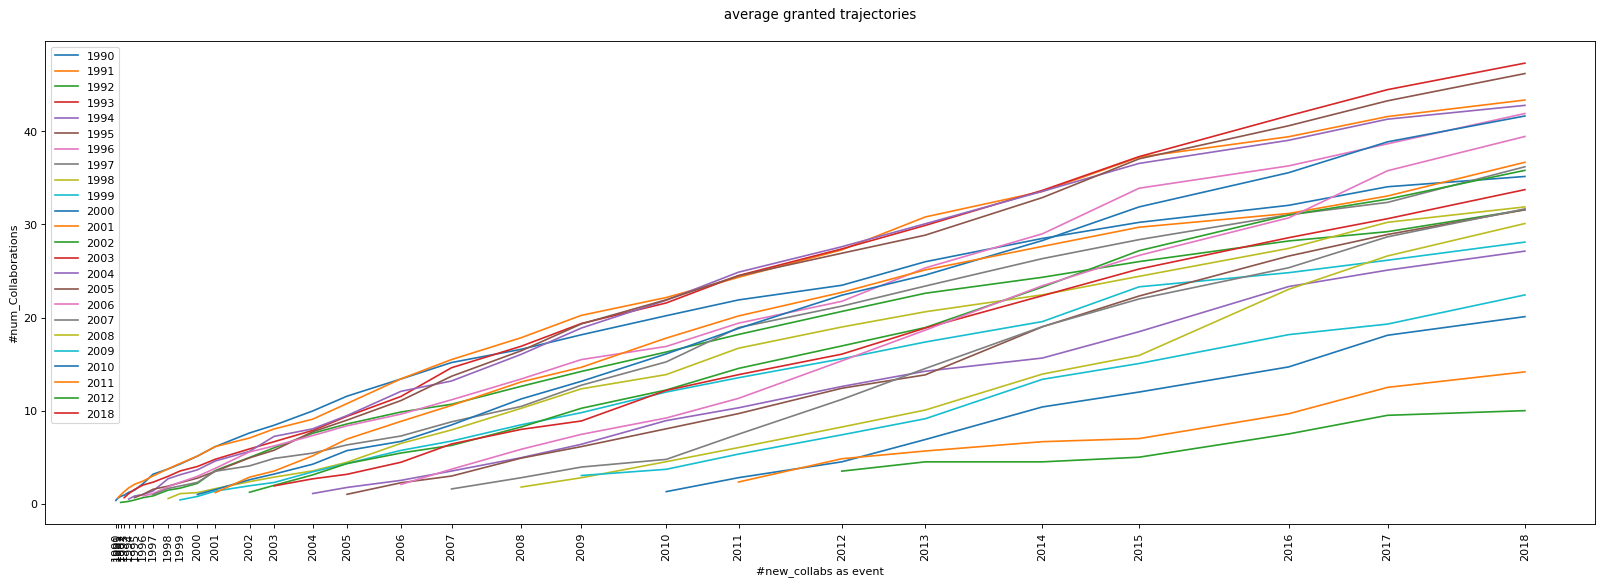

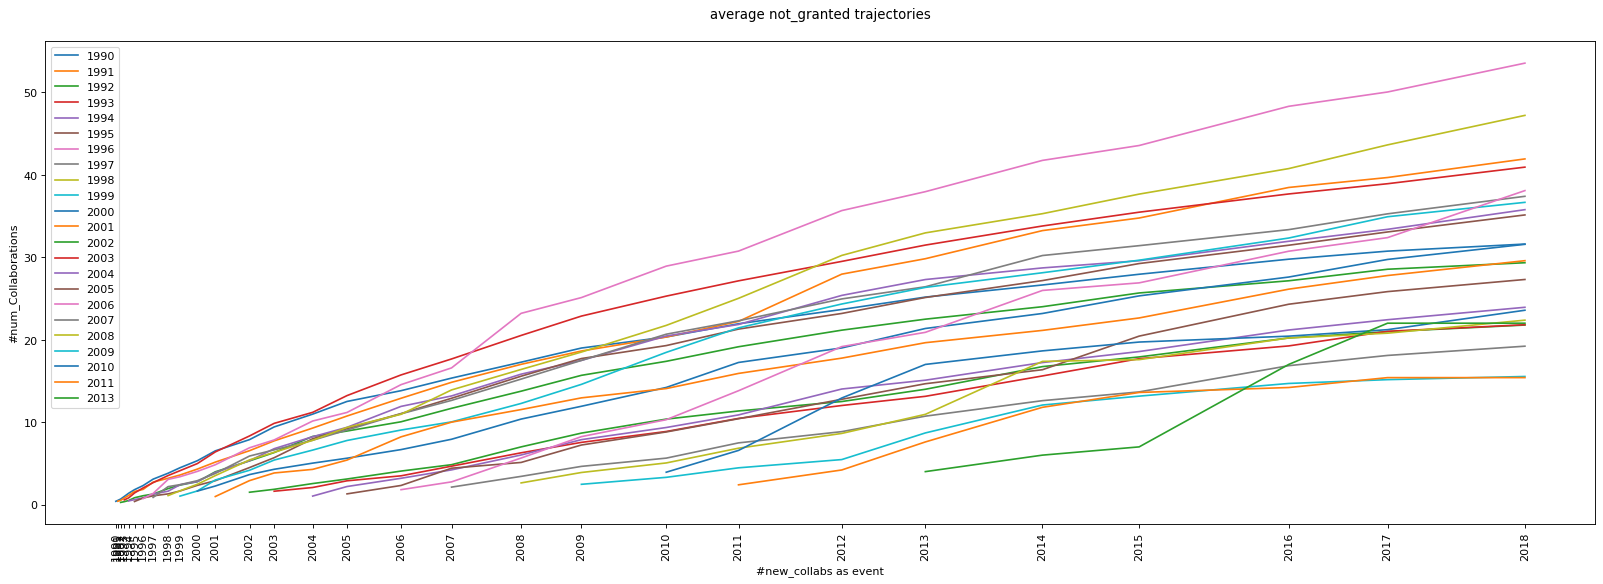

In [117]:
## plot avg granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("average granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:
    # get trajectories 
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y) 
    if(focal_avg != []):        
        plt.plot(focal_x, focal_avg, label=start_y)

plt.legend(loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()


## plot avg not_granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("average not_granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:   
    # get trajectories 
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y)
    if(control_avg != []):
        plt.plot(control_x, control_avg, label=start_y)

plt.legend(loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()


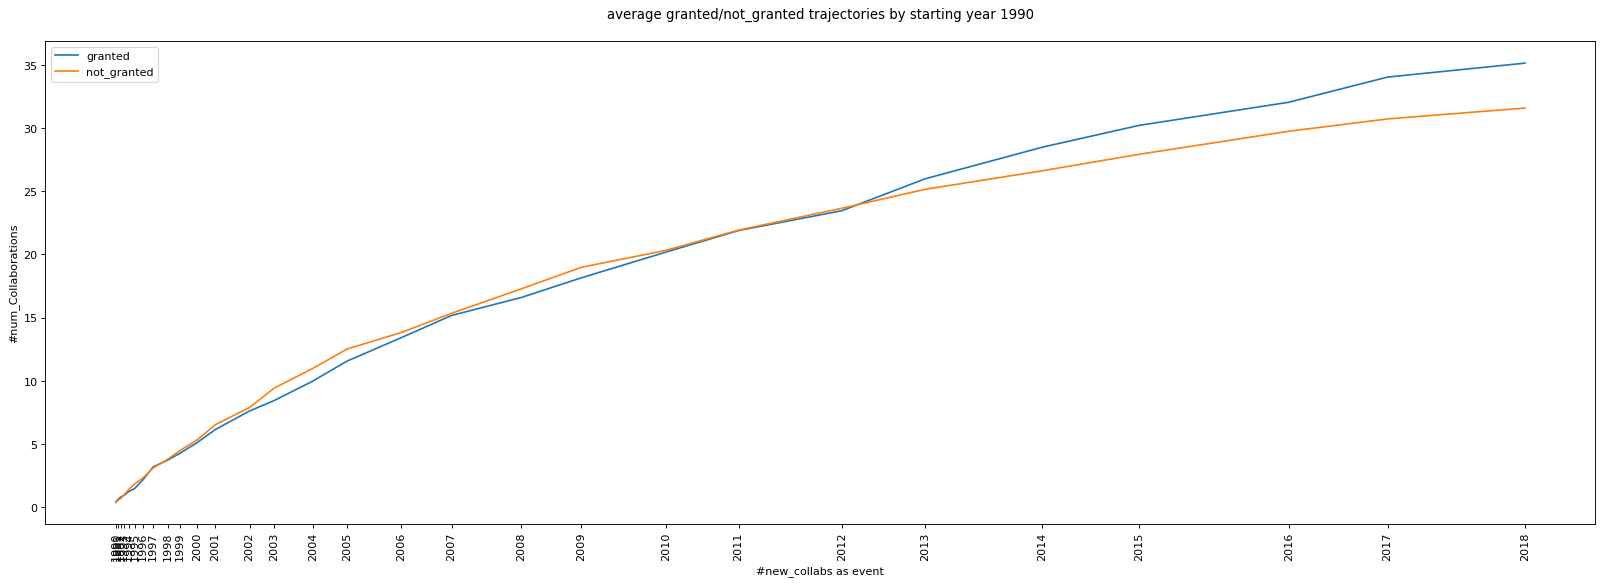

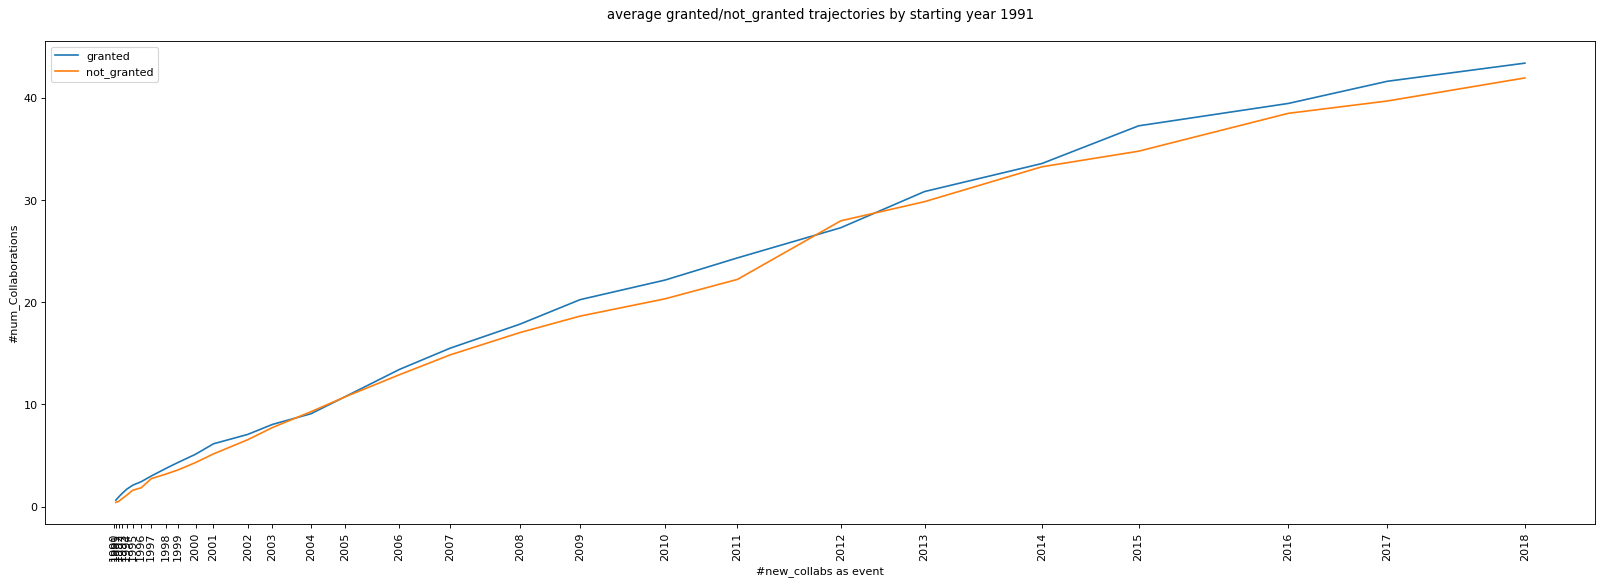

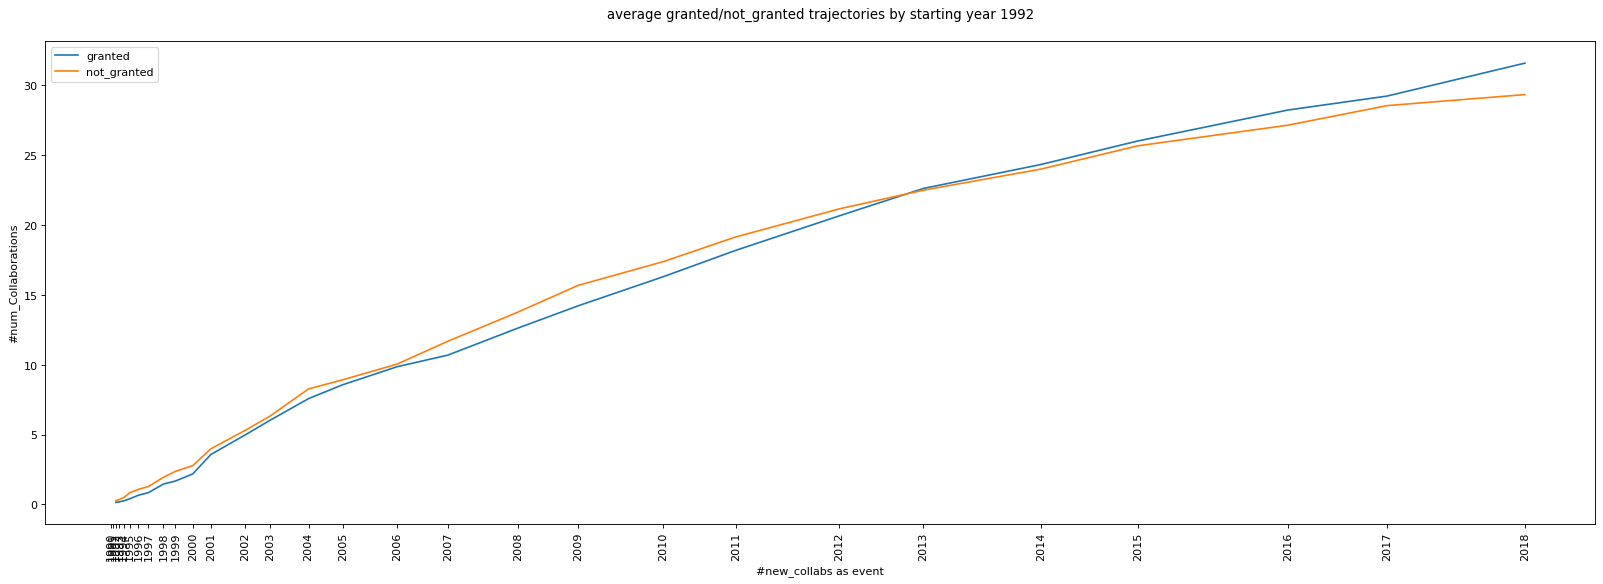

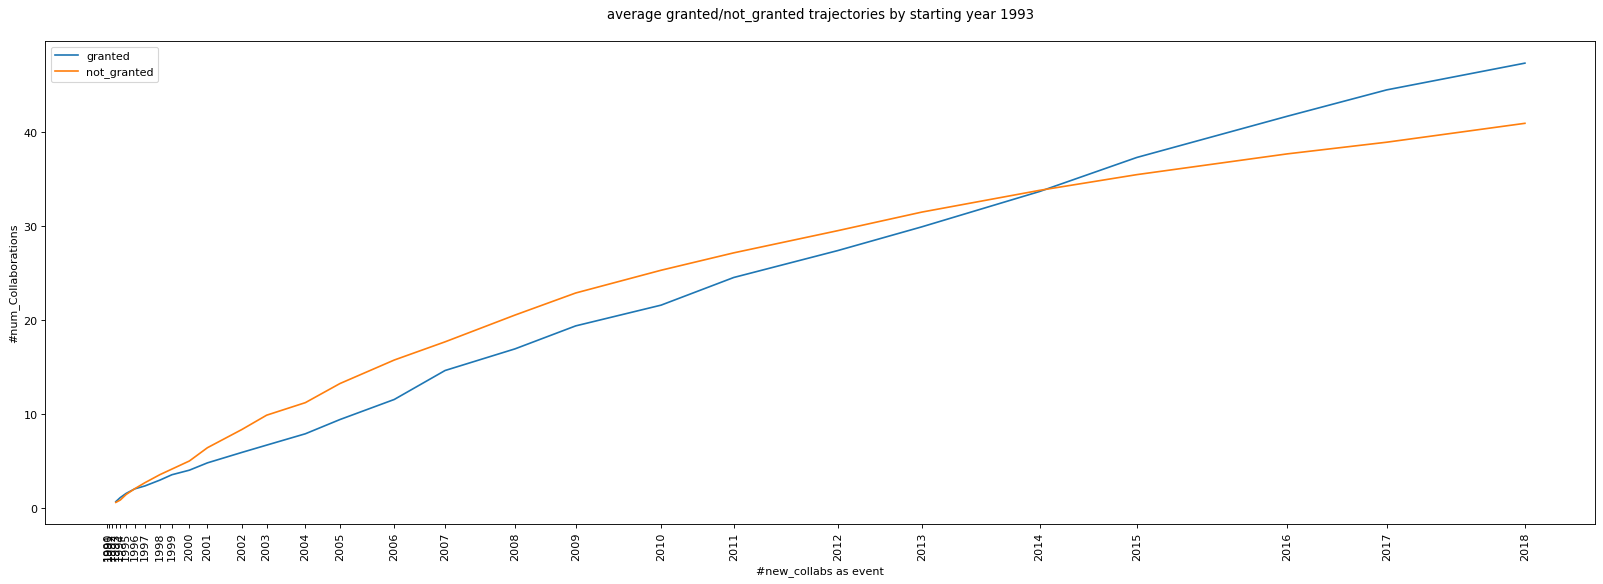

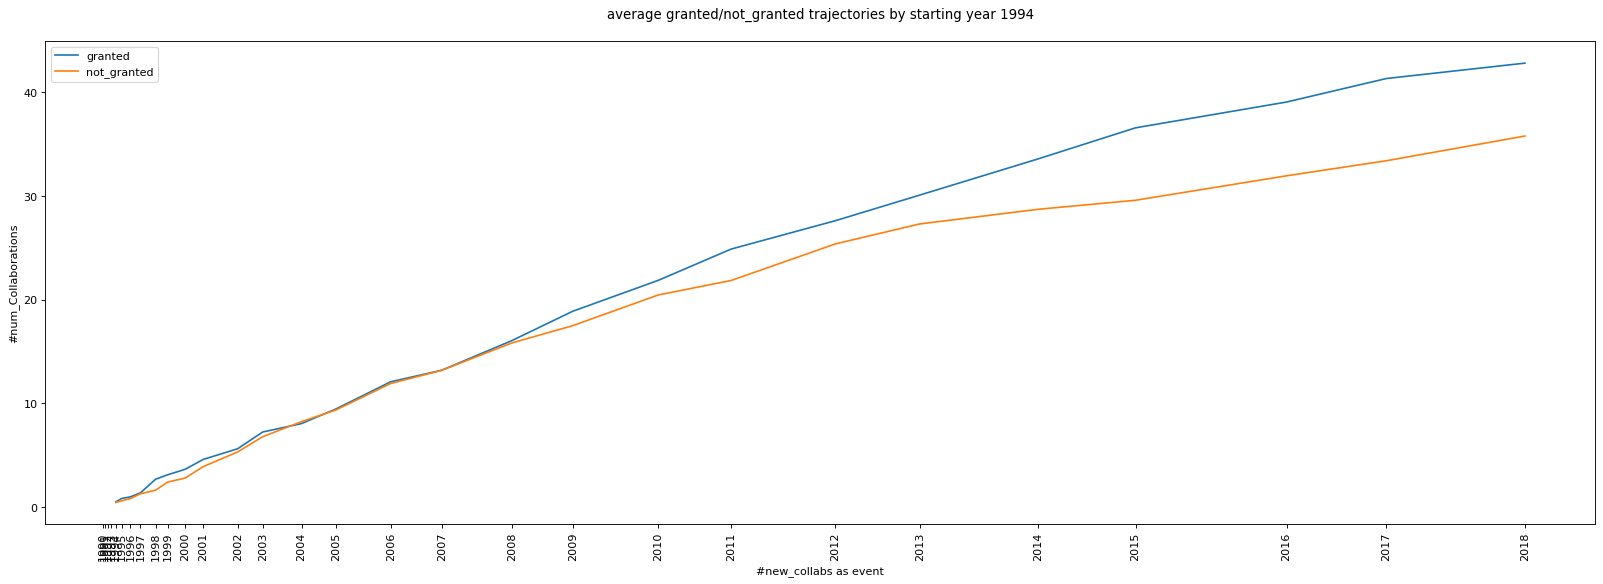

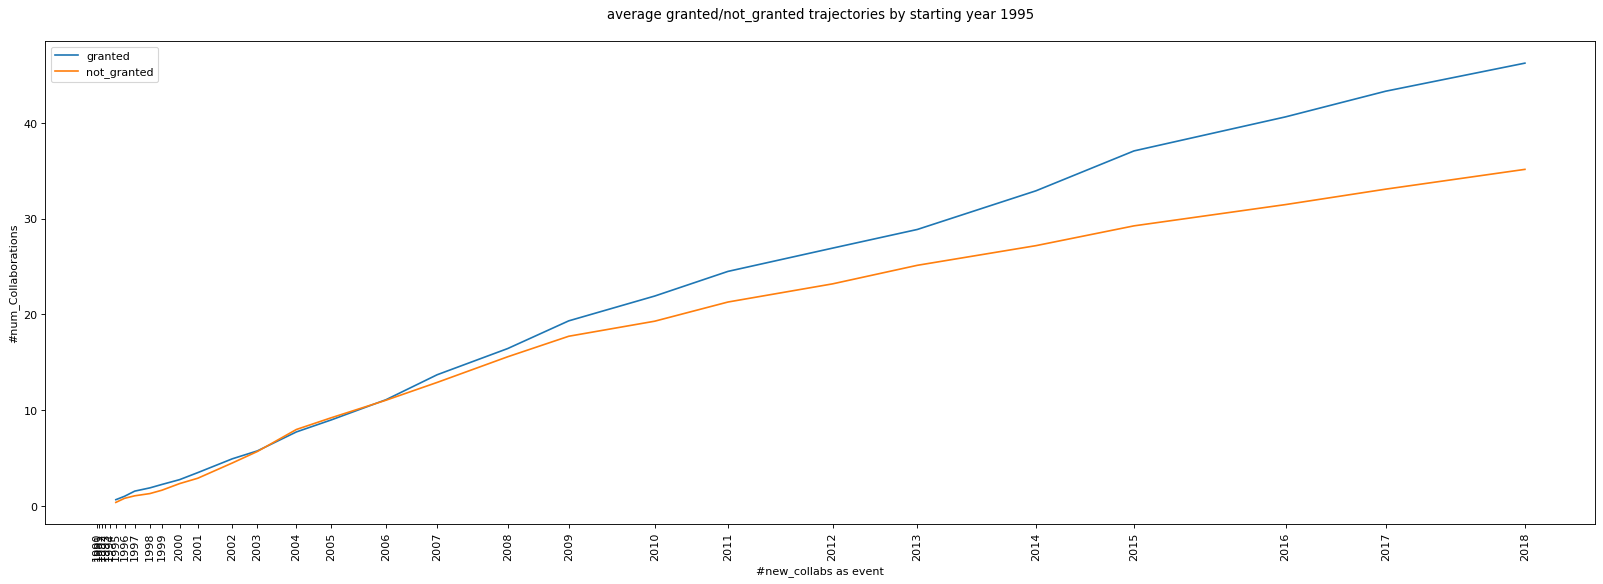

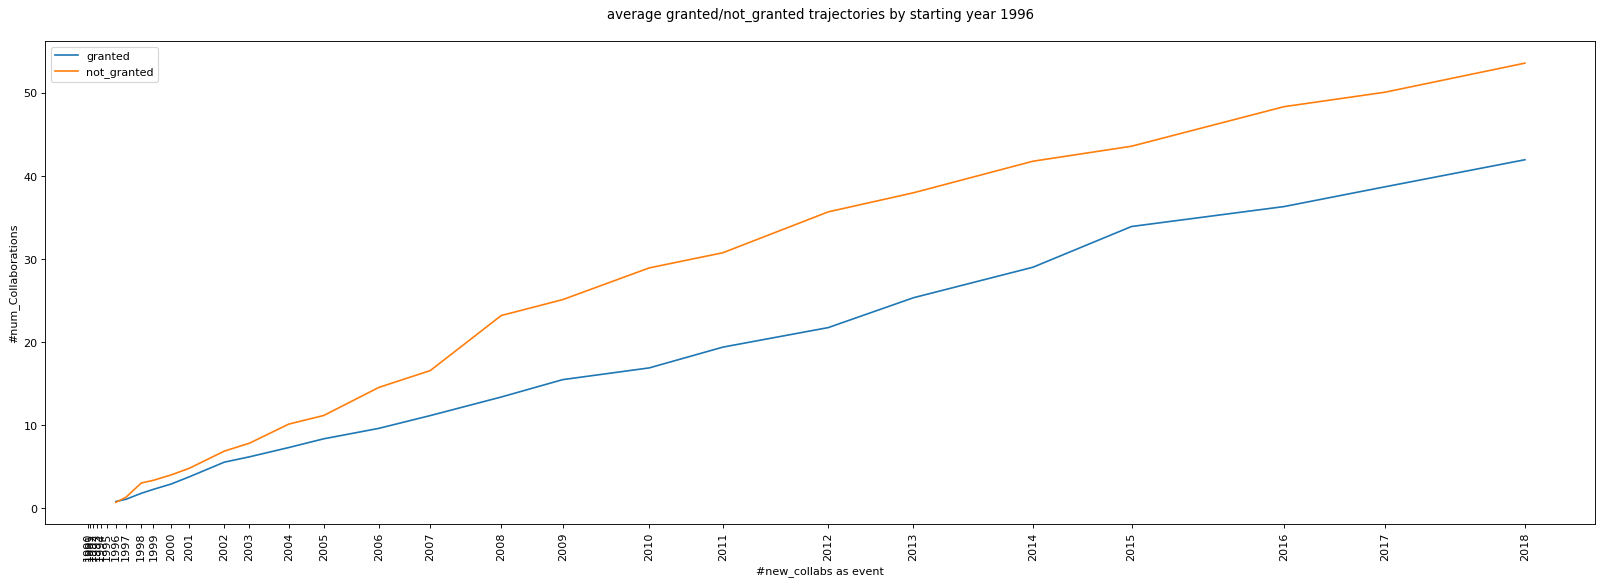

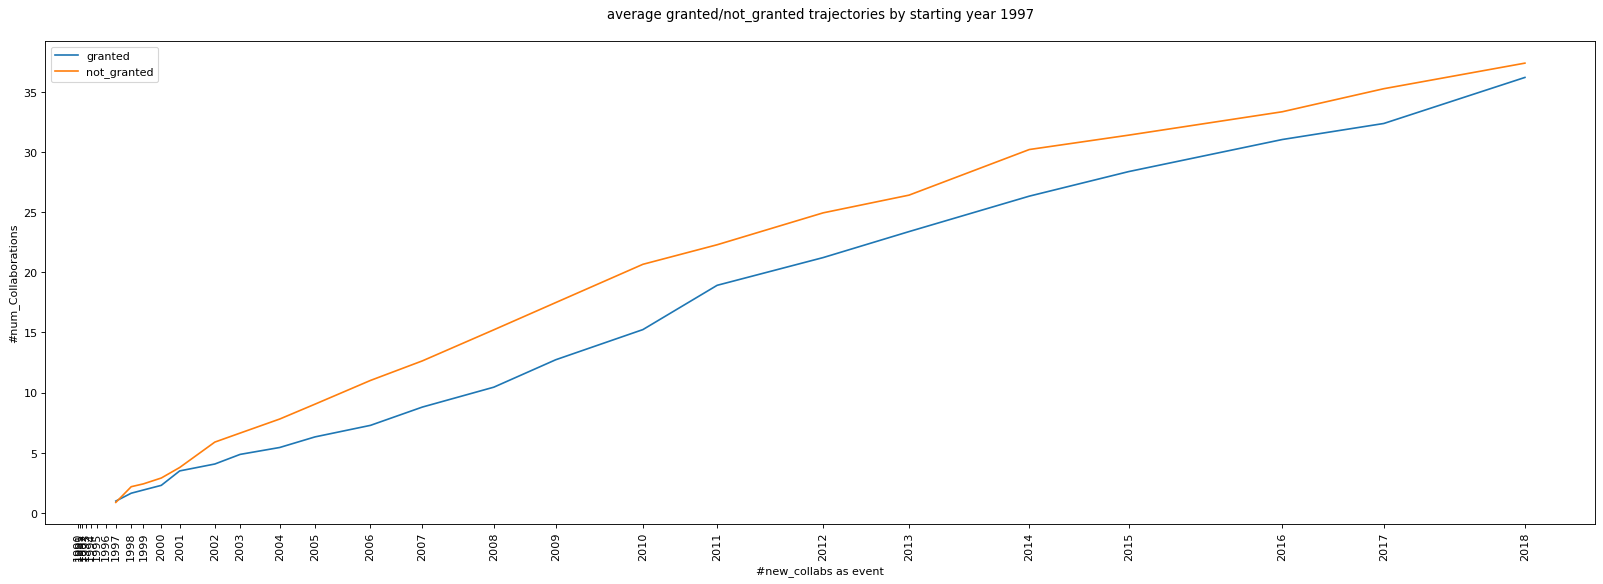

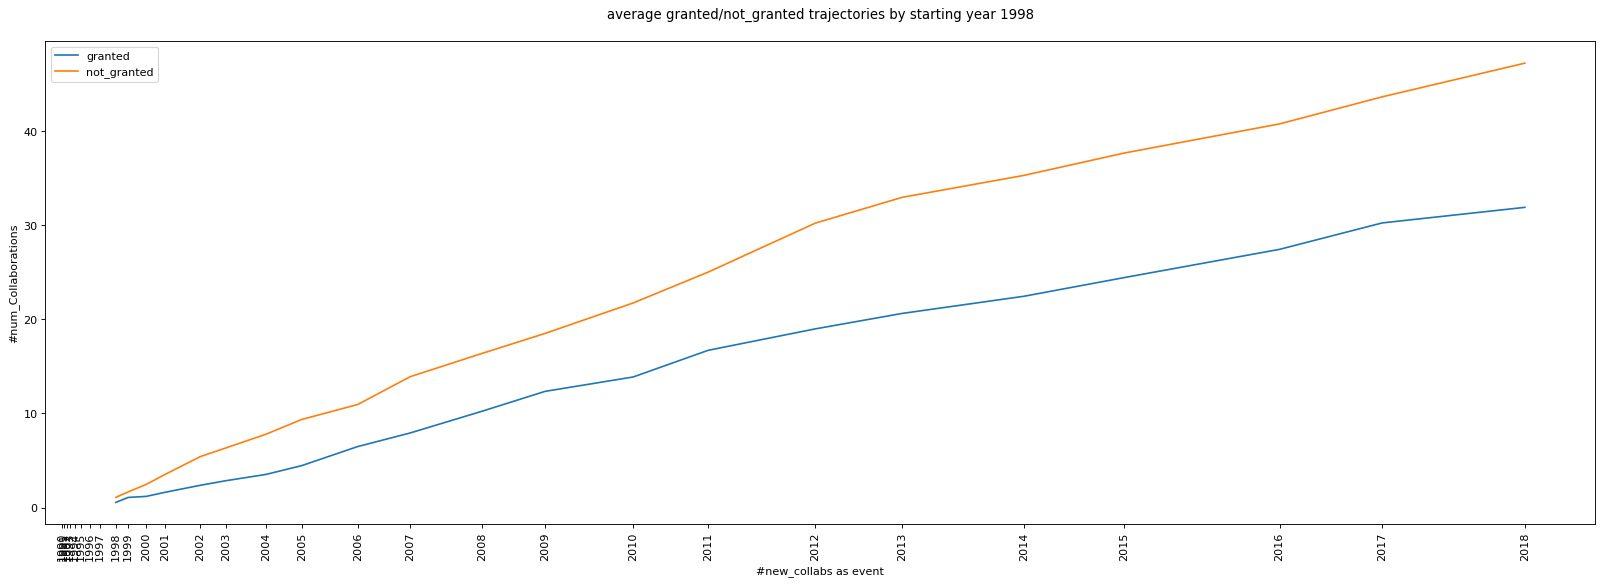

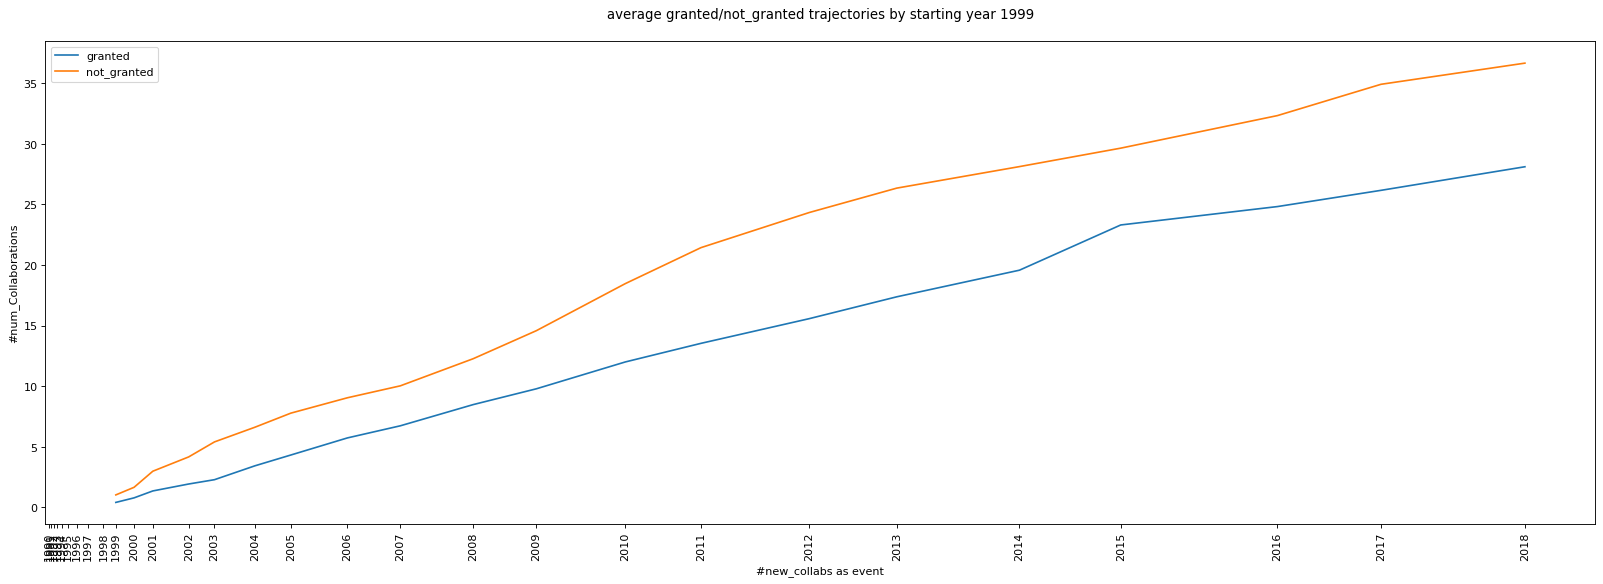

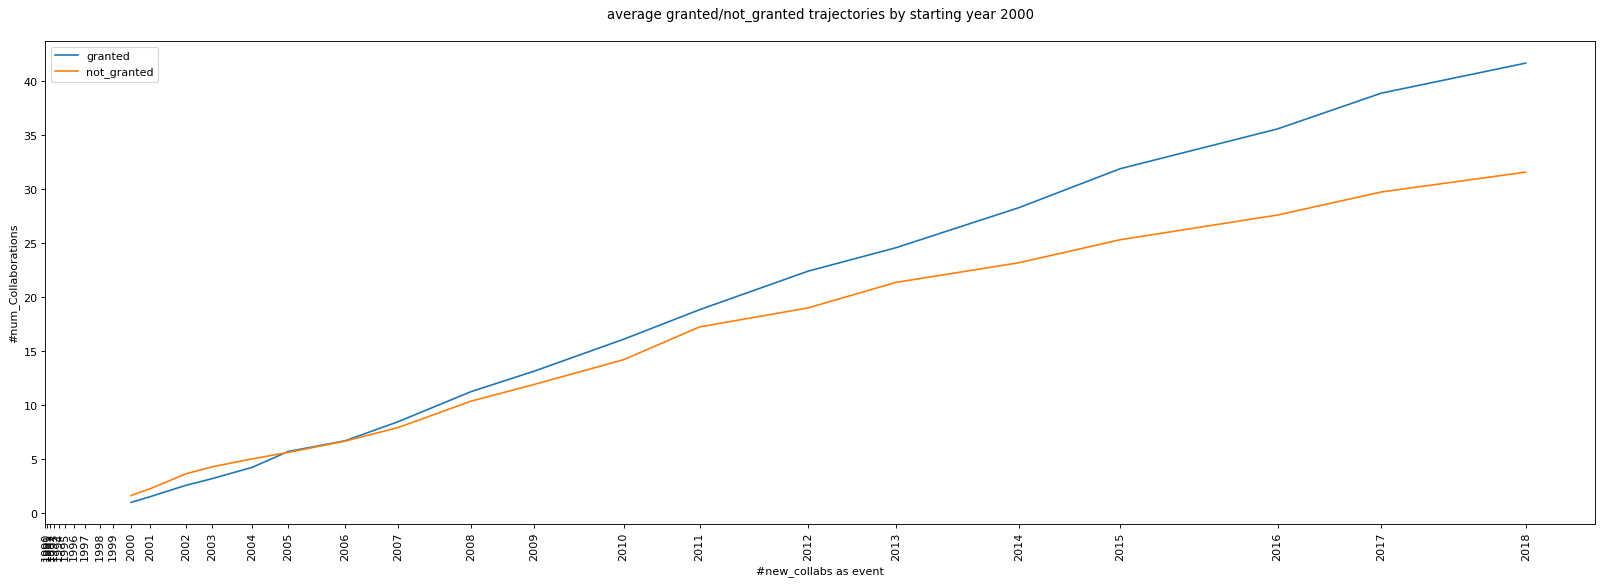

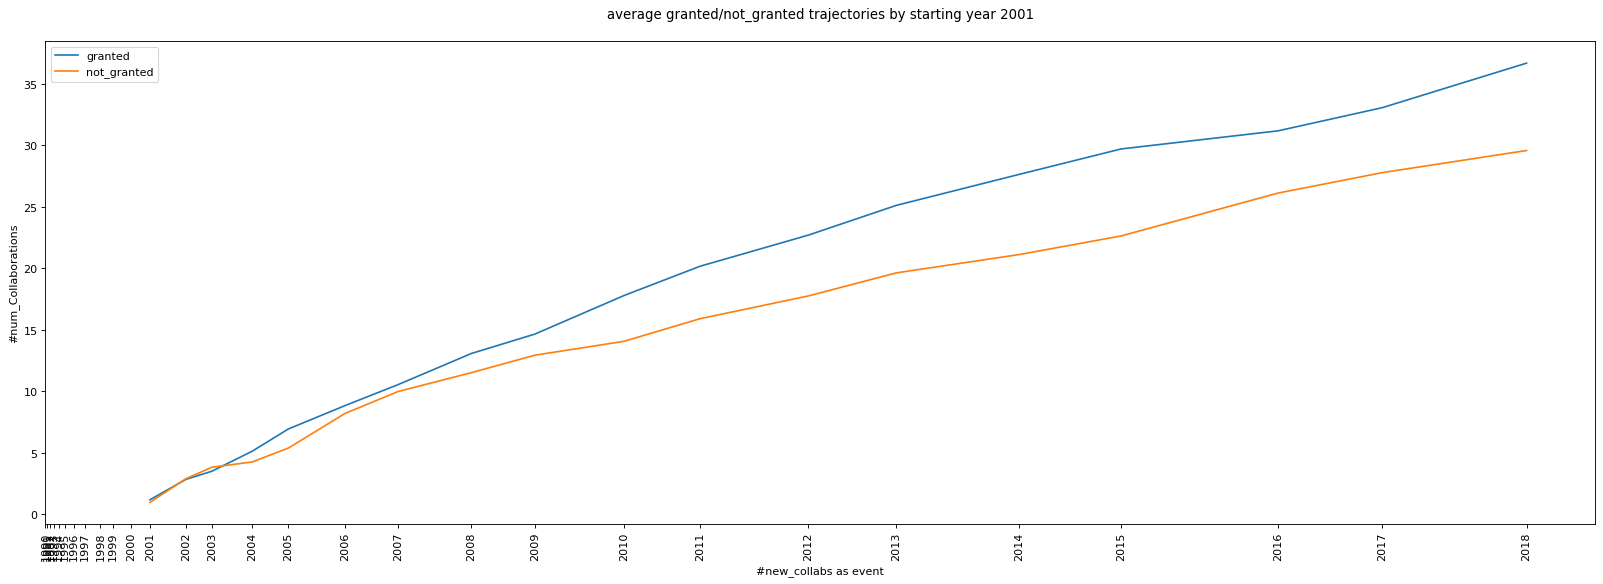

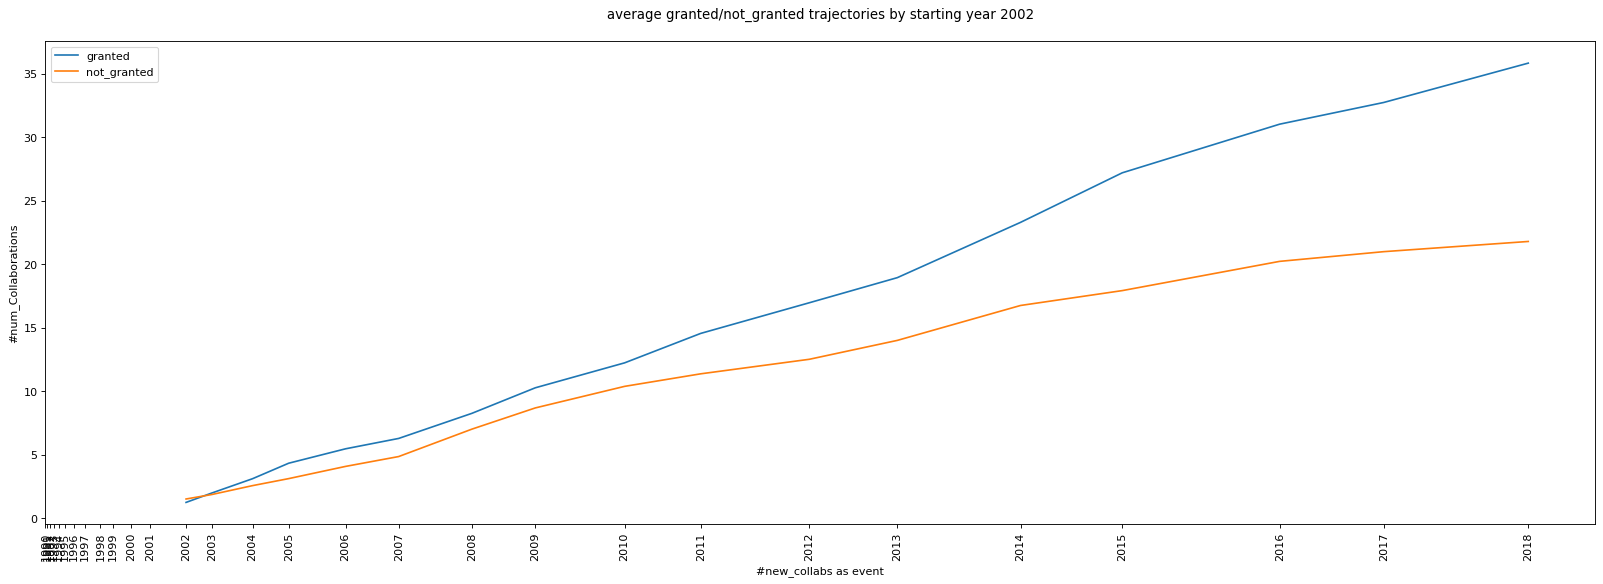

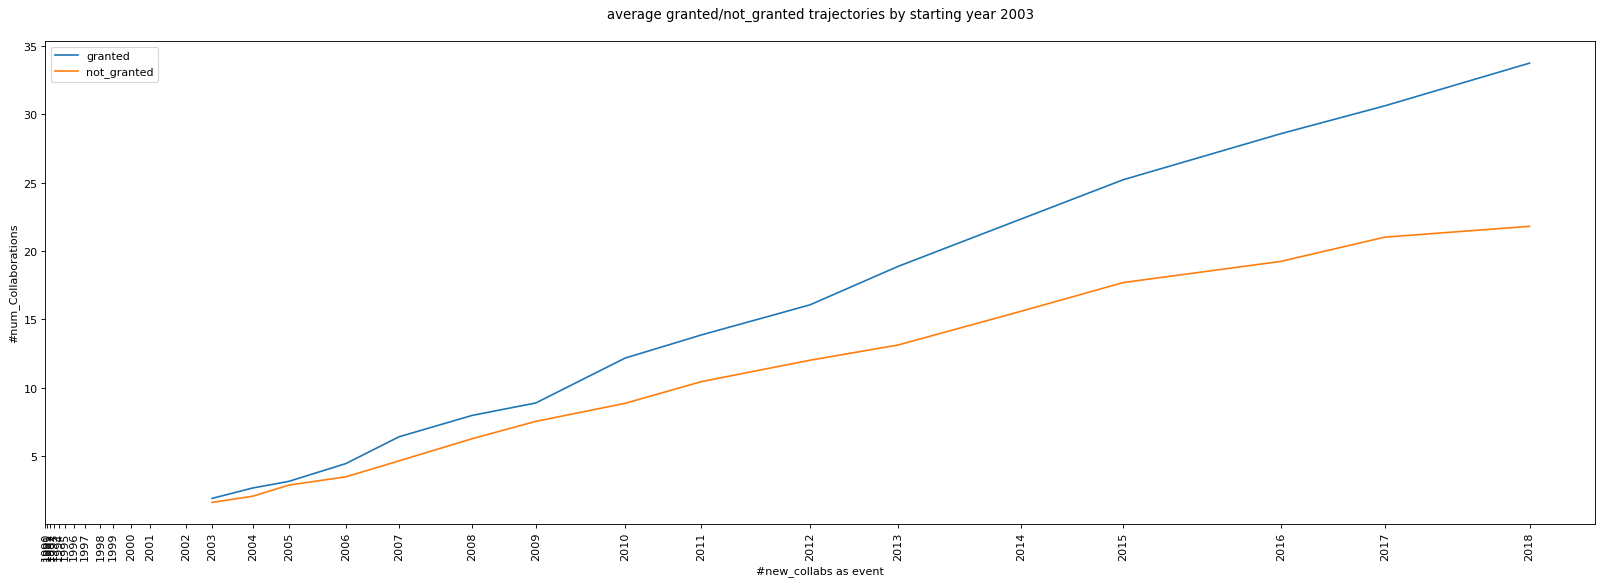

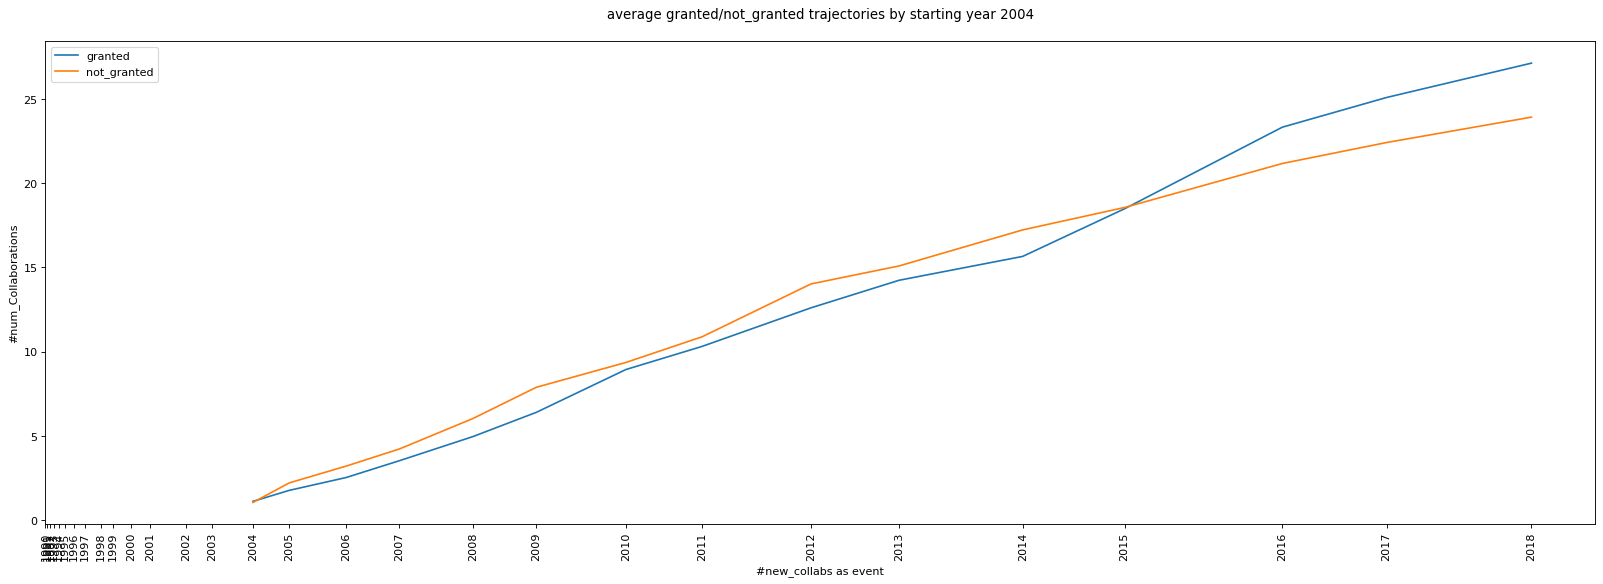

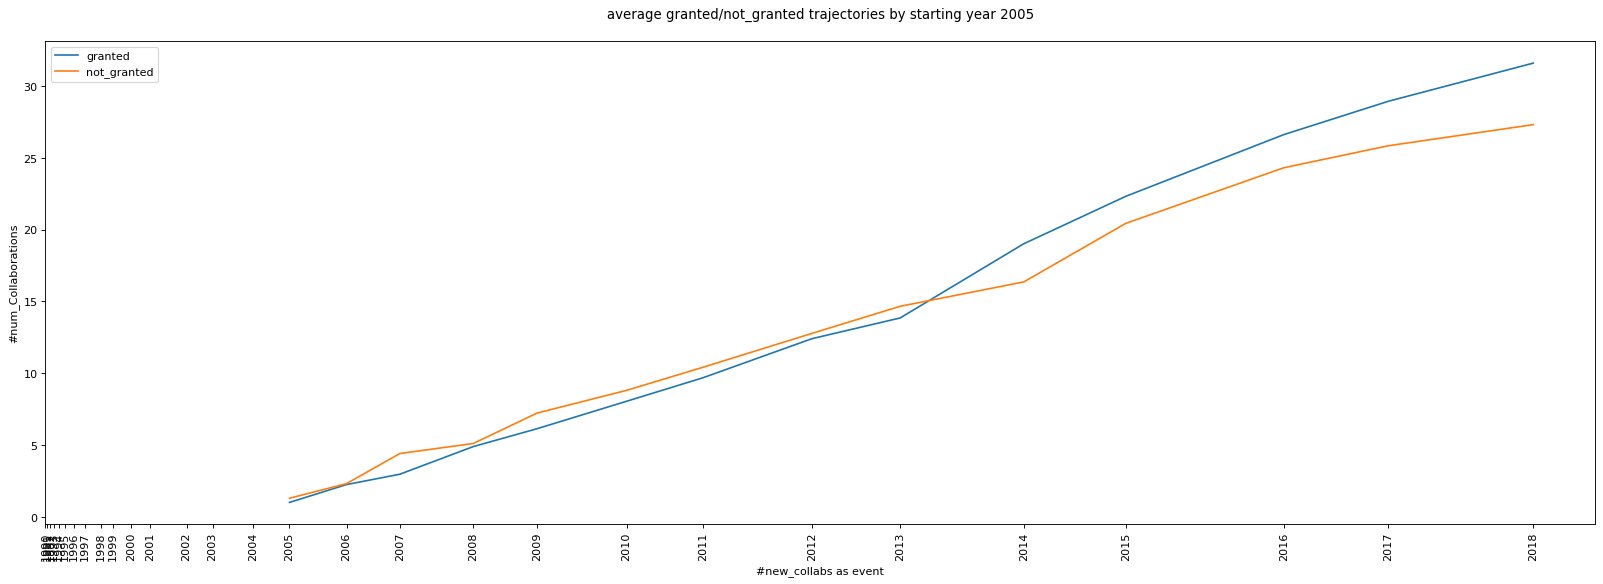

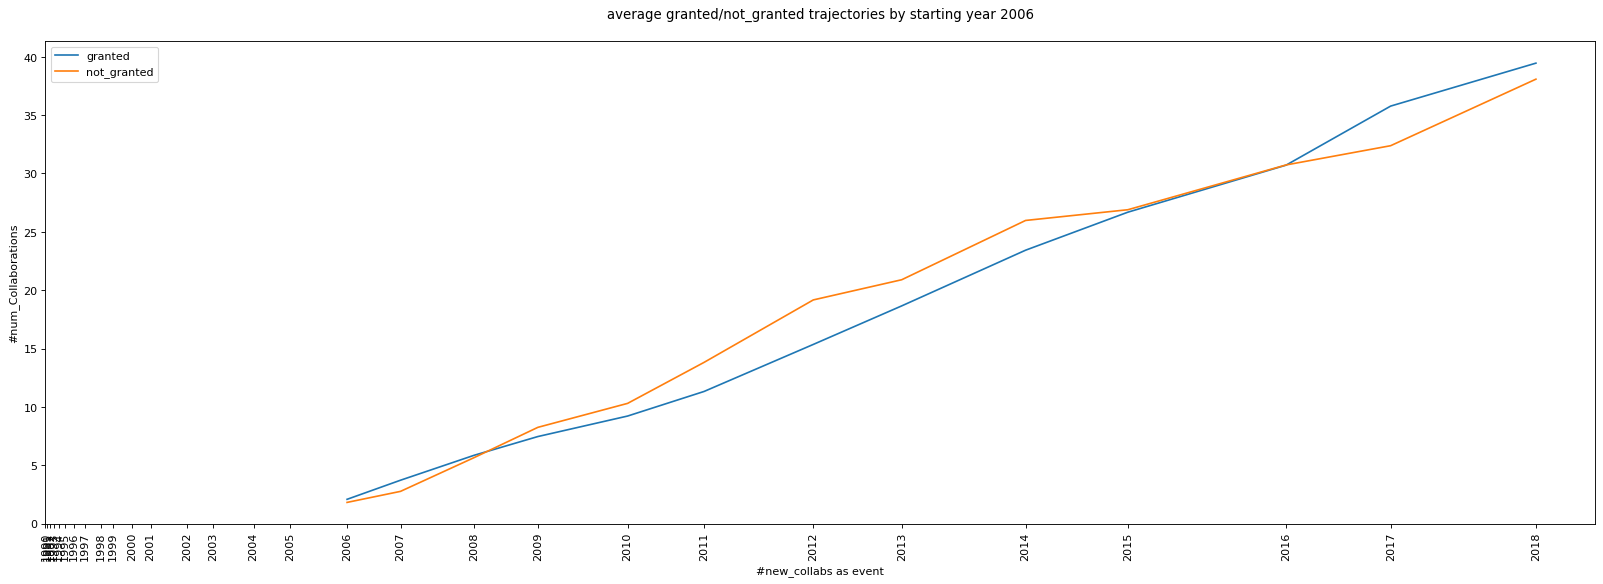

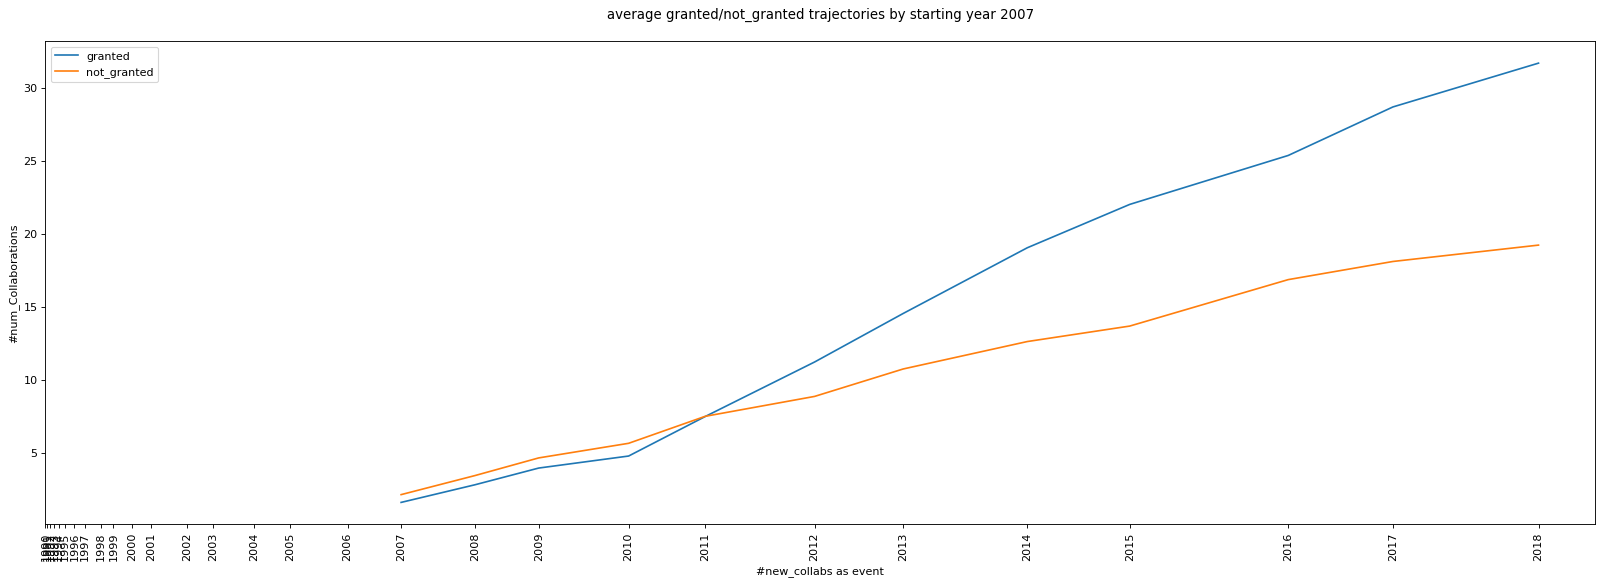

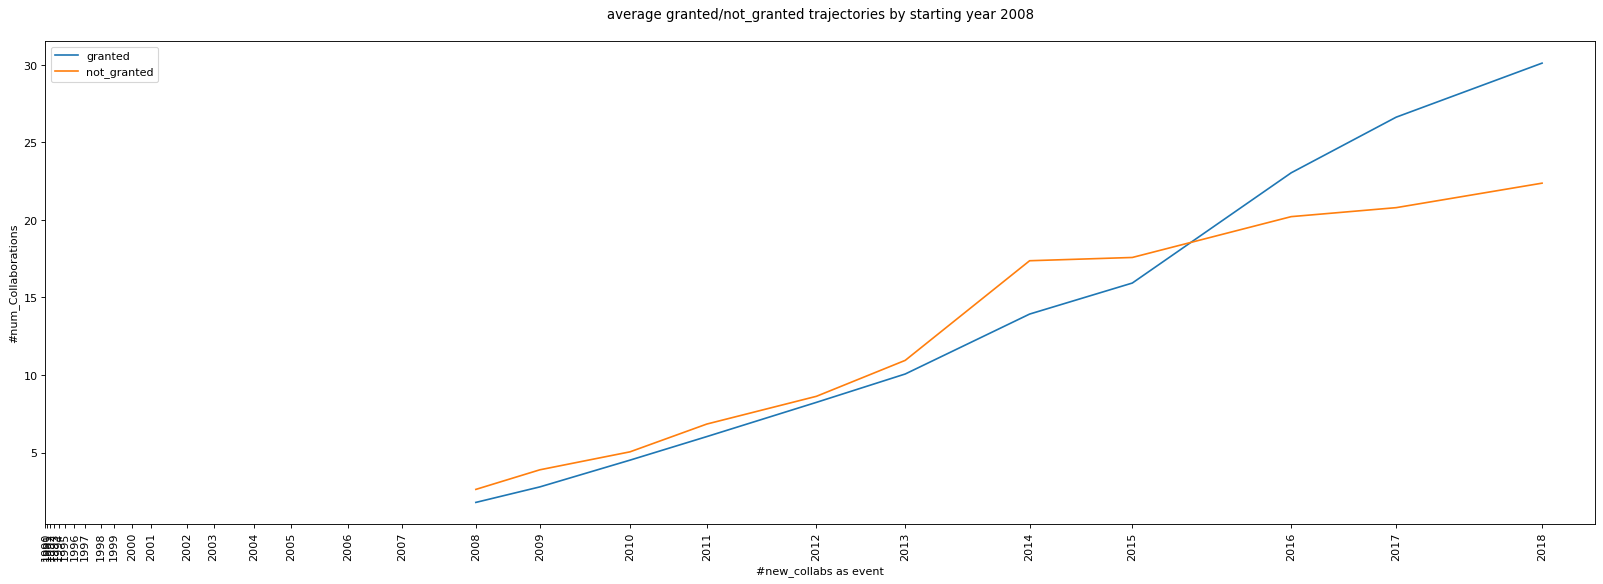

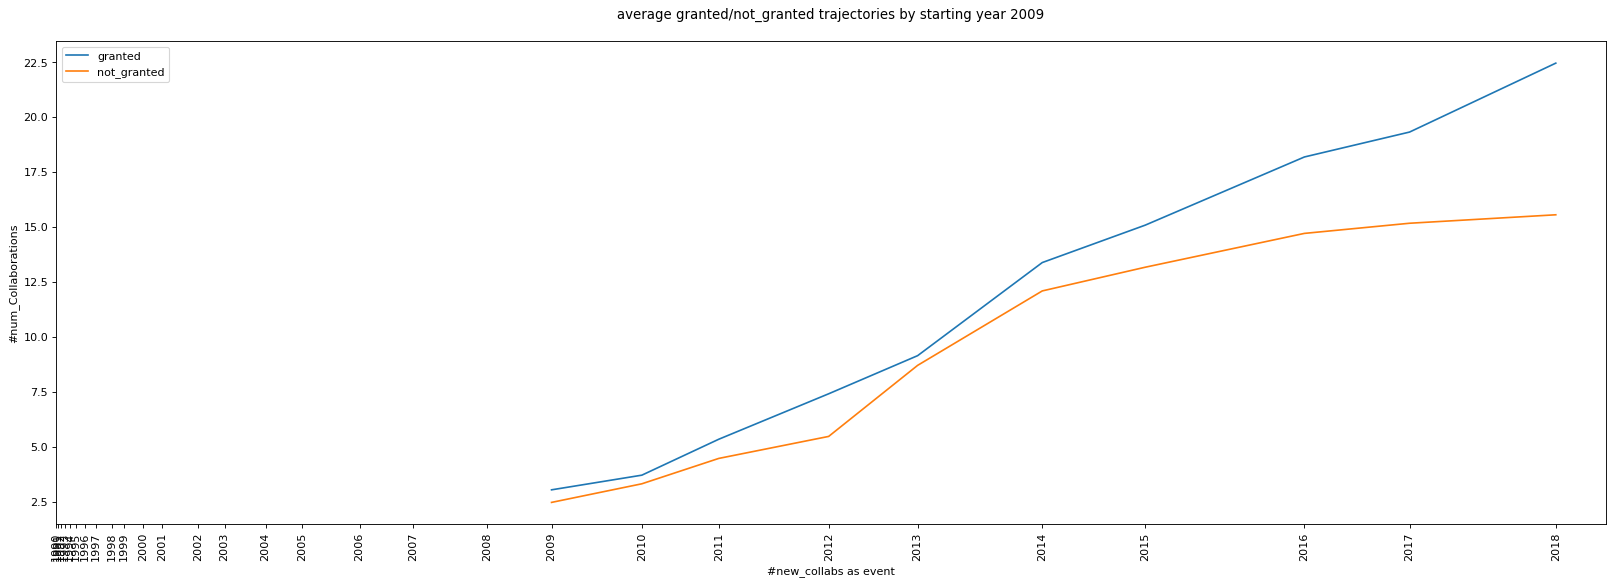

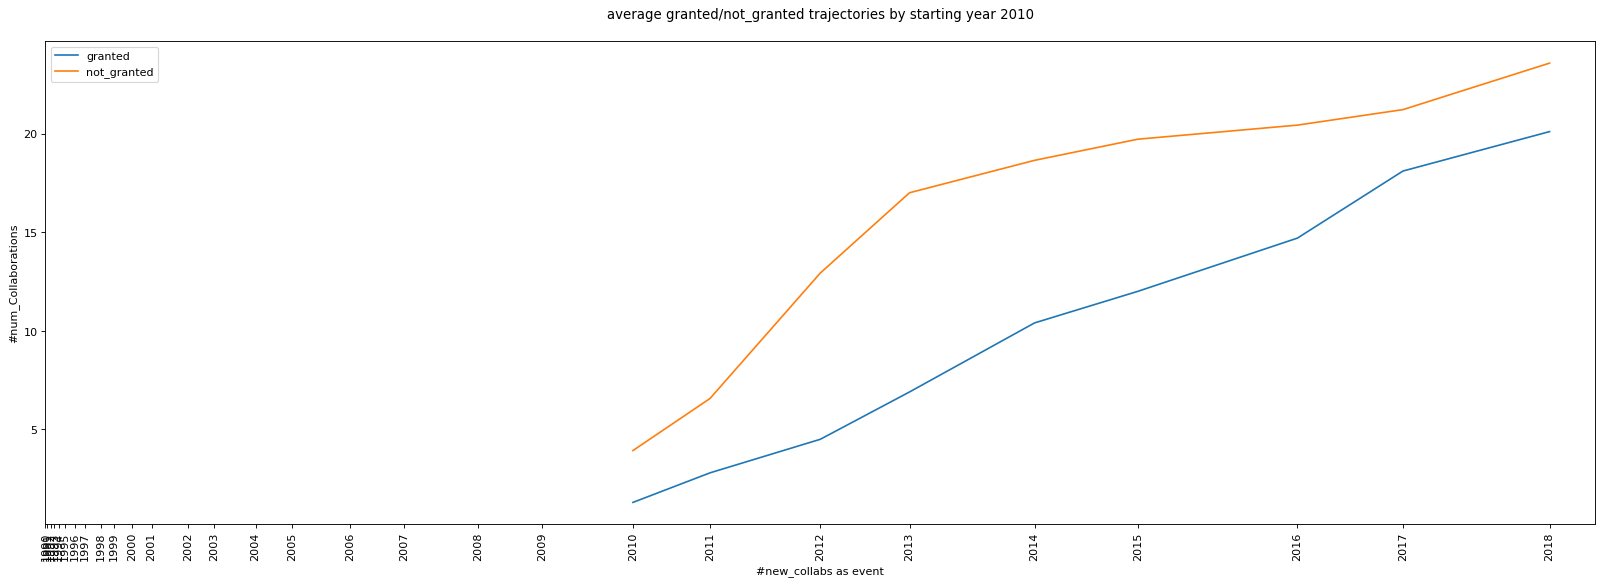

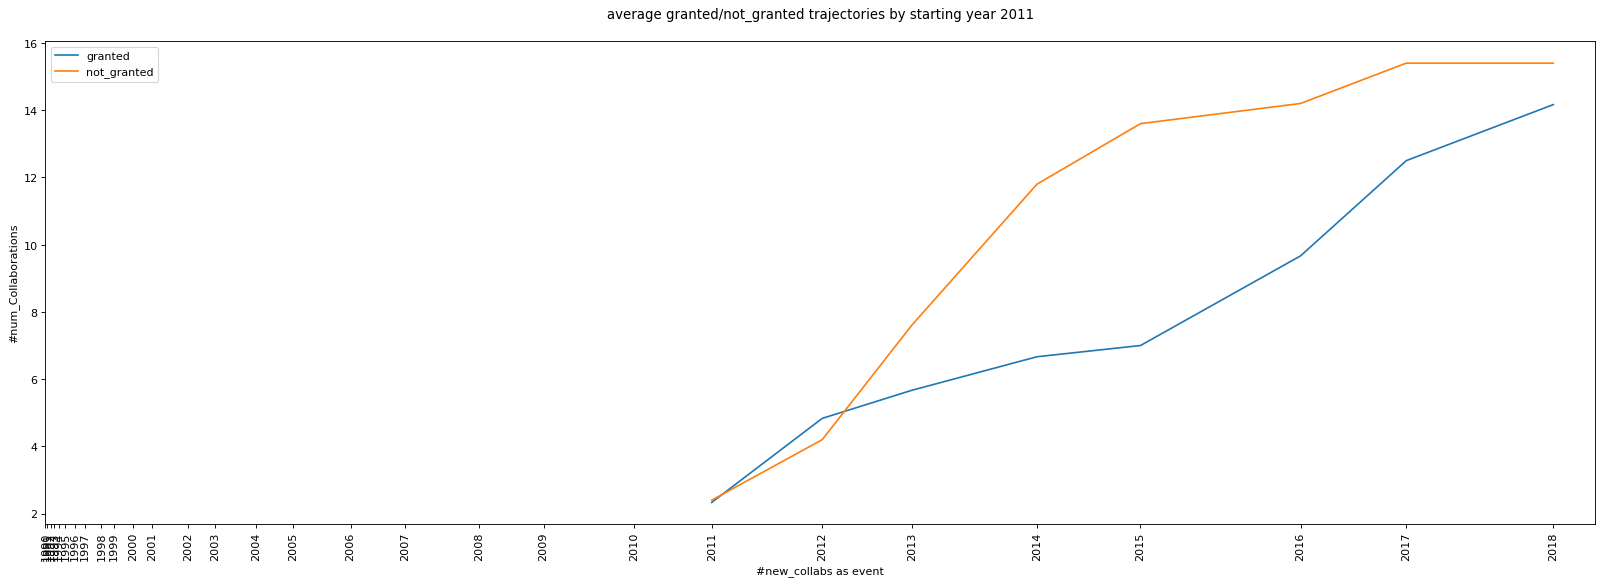

In [118]:
## plot avg granted/not_granted trajectories by starting year (one by one)

for start_y in YEARS:
    
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y) 
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y)

    if(focal_avg != [] and control_avg != []):
        plt.figure(figsize=(25, 8), dpi=80)
        plt.title("average granted/not_granted trajectories by starting year " + start_y + "\n", fontdict = {'fontsize' : 12})
        plt.xlabel("#new_collabs as event")
        plt.ylabel("#num_Collaborations")
        plt.xticks(rotation='vertical')
        
        plt.plot(focal_x, focal_avg, label="granted")
        plt.plot(control_x, control_avg, label="not_granted")

        plt.legend(loc='upper left')
        plt.xticks(EVENTS, YEARS)
        plt.show()


# (2) **SHIFT of real data to perform a weighted average**

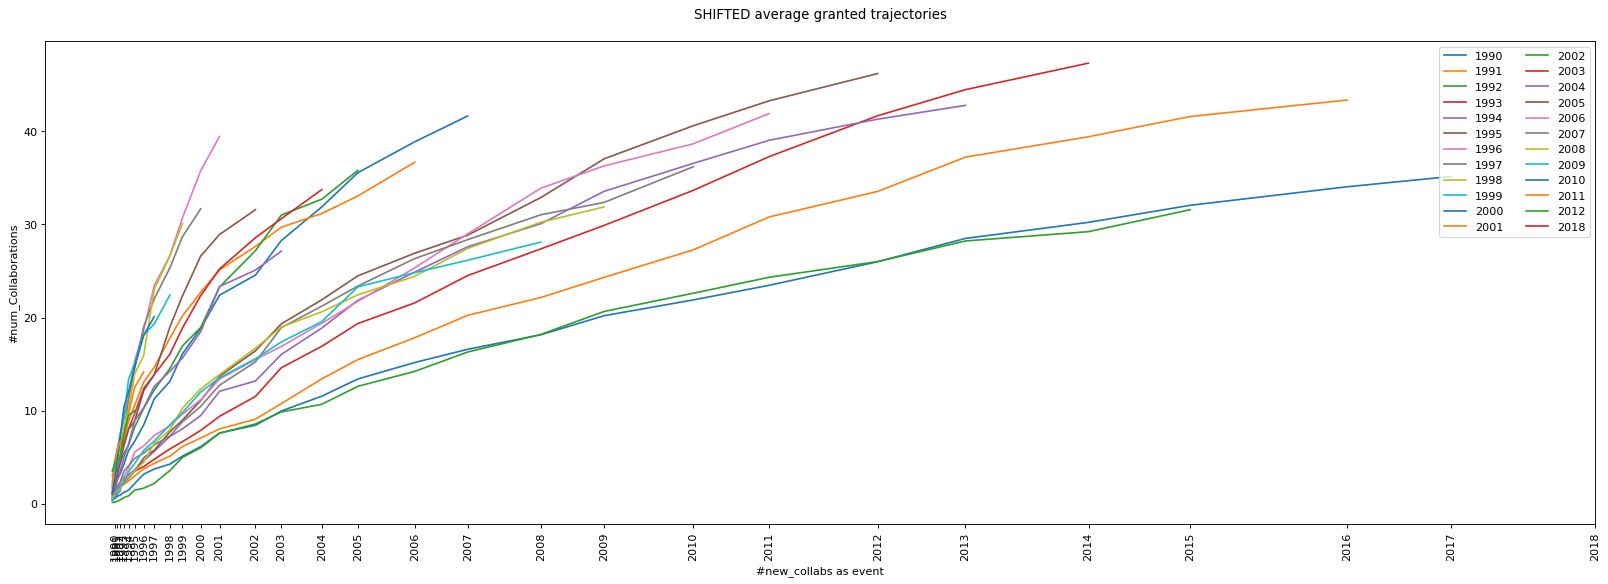

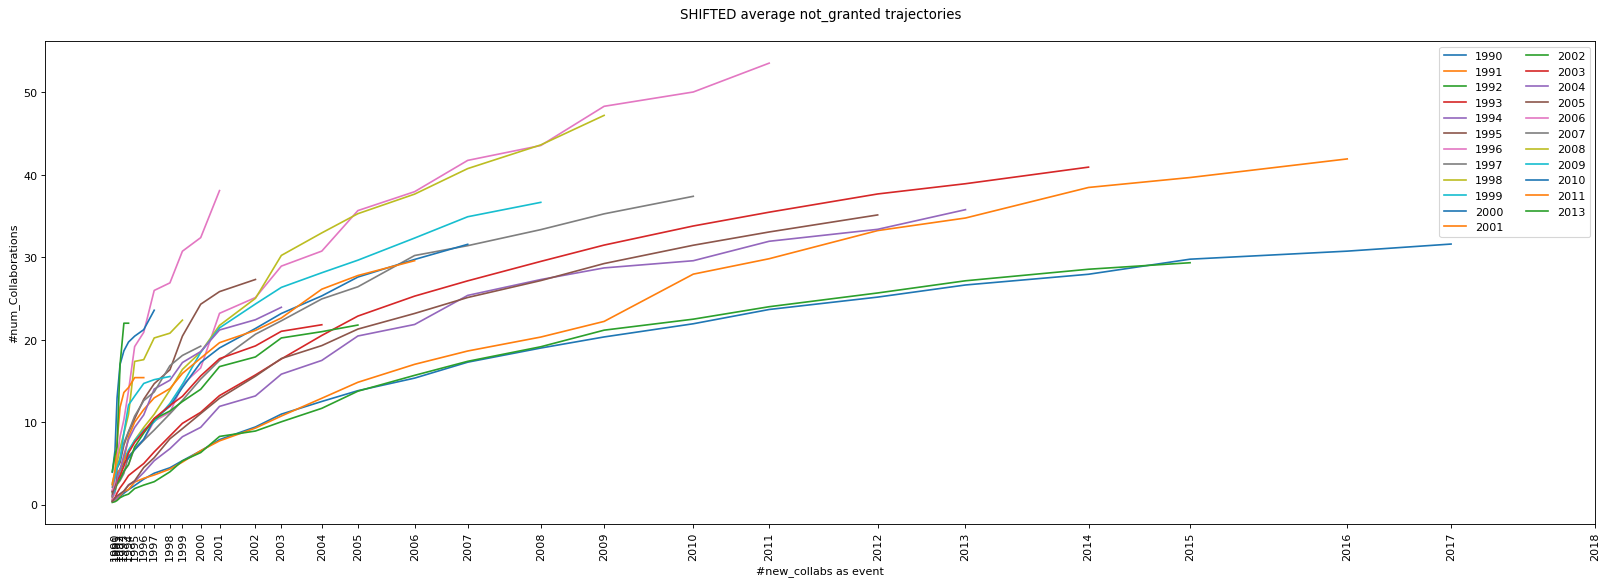

In [119]:
## plot shifted average granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("SHIFTED average granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:
    
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y) 
    
    # use the shifted the x axis     
    if(focal_avg != []):
        plt.plot(SHIFTED_X[:len(focal_x)], focal_avg, label=start_y)

plt.legend(loc='upper right', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()

## plot shifted average not_granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("SHIFTED average not_granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:
    
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y)

    # use the shifted the x axis     
    if(control_avg != []):
        plt.plot(SHIFTED_X[:len(control_x)], control_avg, label=start_y)

plt.legend(loc='upper right', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()



## (2.1) **computing weighted average**

In [120]:
# compute the average for previously shifted average trajectories wighted by the number of authors associated with each year

# arrays containing the weighted averages
shift_granted_avg, shift_not_granted_avg = [0 for i in range(len(EVENTS))], [0 for i in range(len(EVENTS))]

for start_y in YEARS:
    
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y)  # average trajectory associated with the starting year 
    num_focal = len(granted[granted["start_year"]==int(start_y)]) # number of authors associated with the starting year  
    
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y )# average trajectory associated with the starting year 
    num_control = len(not_granted[not_granted["start_year"]==int(start_y)]) # number of authors associated with the starting year  

    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(focal_avg)) :
        if(focal_avg == []):
            shift_granted_avg[i] +=  0
        else:
            shift_granted_avg[i] += num_focal*focal_avg[i] 
        
        if(control_avg == []):
            shift_not_granted_avg[i] +=  0
        else:
            shift_not_granted_avg[i] += num_control*control_avg[i]    

# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)
for i in range(len(EVENTS)):
    shift_granted_avg[i] = shift_granted_avg[i]/d
    shift_not_granted_avg[i] = shift_not_granted_avg[i]/d
    d = d-1

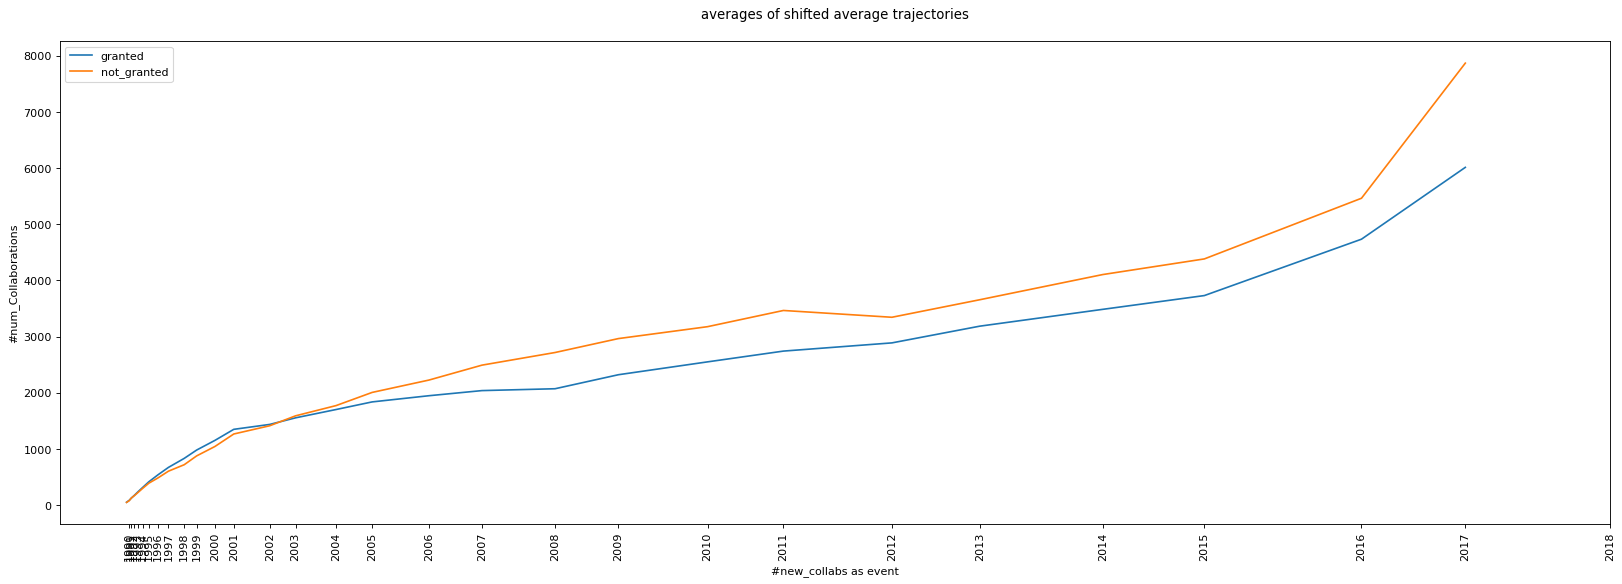

In [121]:
# plot the average of the shifted average trajectories both for granted and not
plt.figure(figsize=(25, 8), dpi=80)
plt.title("averages of shifted average trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

plt.plot(SHIFTED_X, shift_granted_avg, label="granted")
plt.plot(SHIFTED_X, shift_not_granted_avg, label="not_granted")

plt.legend(loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()

# (3) **FIT real data and SHIFT the fitting**

## (3.1) - Granted

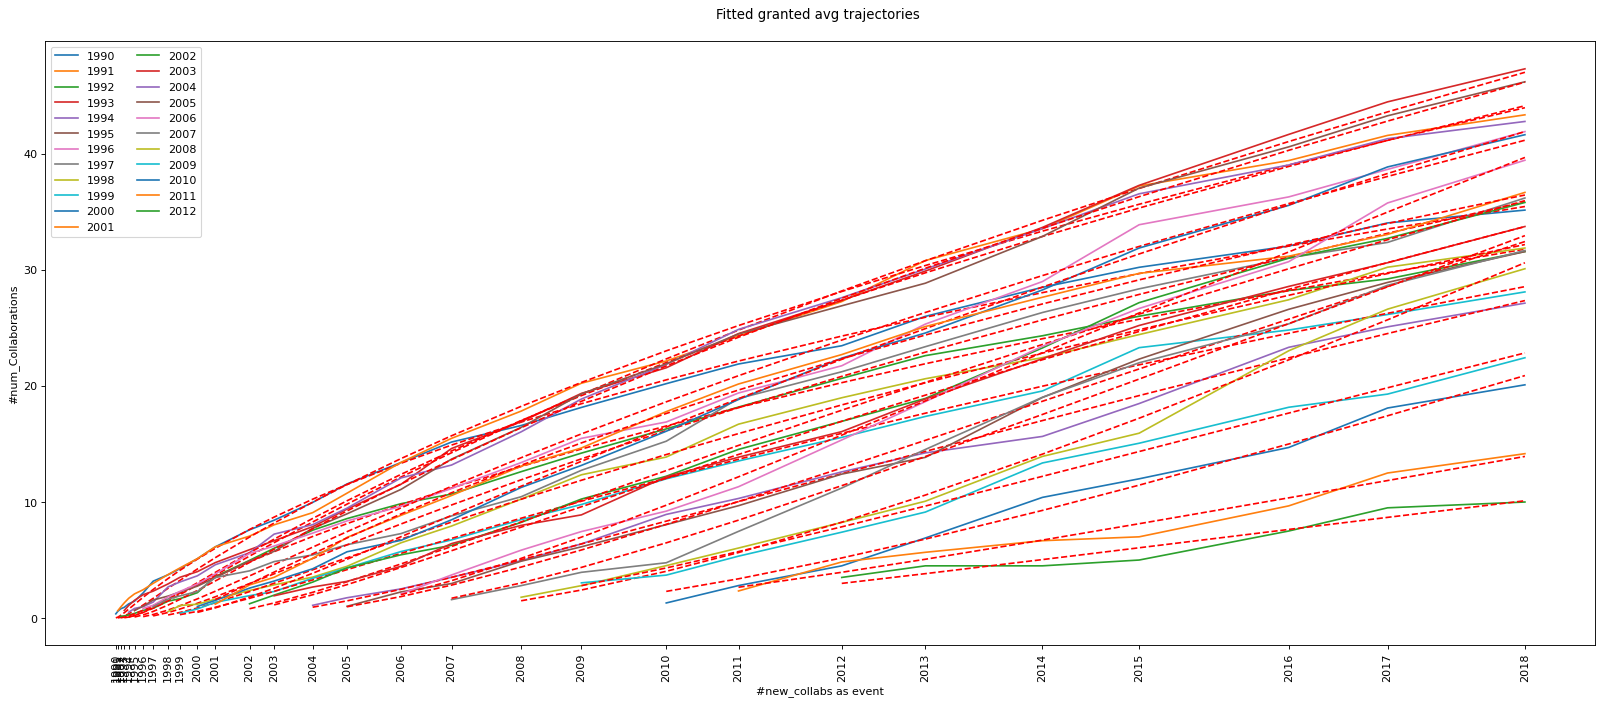

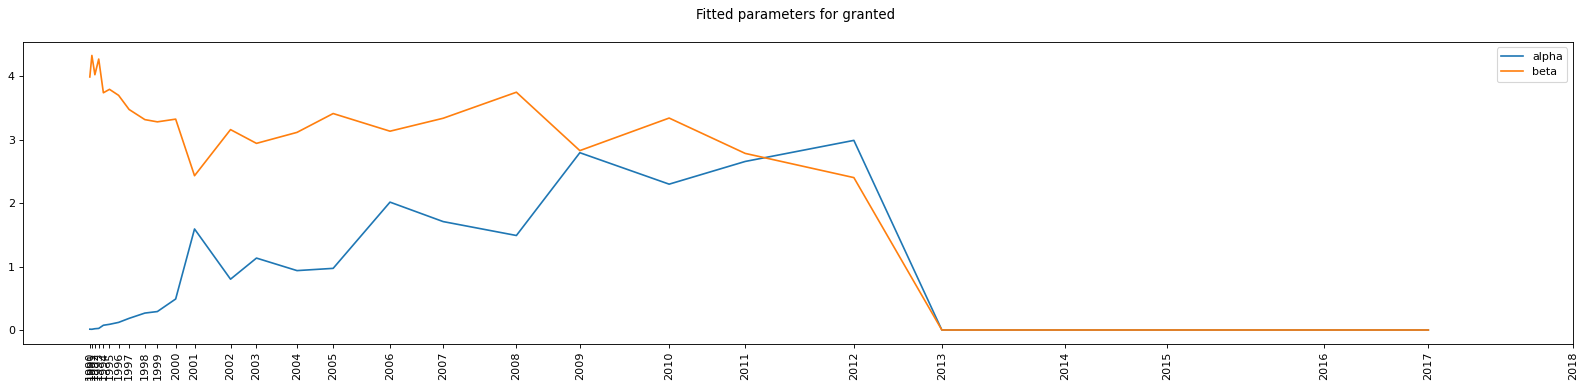

   start_y  granted_alphas  granted_beta
0     1990        0.012751      3.986493
1     1991        0.011424      4.325236
2     1992        0.019962      4.021495
3     1993        0.024931      4.268384
4     1994        0.074679      3.737404
5     1995        0.089351      3.791344
6     1996        0.119696      3.696715
7     1997        0.183321      3.474032
8     1998        0.266498      3.314397
9     1999        0.290530      3.279142
10    2000        0.488450      3.321989
11    2001        1.591521      2.430443
12    2002        0.800413      3.156961
13    2003        1.132926      2.940146
14    2004        0.935704      3.113353
15    2005        0.971003      3.410151
16    2006        2.014358      3.131889
17    2007        1.707814      3.335818
18    2008        1.488731      3.745930
19    2009        2.793051      2.825986
20    2010        2.297479      3.338872
21    2011        2.655103      2.782090
22    2012        2.987221      2.400757


In [122]:
## Plot fitted average trjectories for granted
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted granted avg trajectories \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

granted_alphas = []
granted_betas = []
for start_y in YEARS[:-1]:

    curr_x = EVENTS[YEARS.index(start_y)]  
    
    # get focal's trajectories 
    x,y = get_focals_avg_trajectories(EVENTS, start_y)
    
    if(y != []):
        fit_y, alpha, beta = fit_trajectory(x, y, curr_x) # fit the real data above with the theoretical trajectory 
        
        plt.plot(x,y, label=str(start_y))
        plt.plot(x,fit_y, 'r--')
        
        plt.xticks(x, fit_y)
        plt.xticks(rotation='vertical')
    else:
        alpha = 0
        beta = 0
        
    # save fitted parameters alpha, beta
    granted_alphas.append(alpha)
    granted_betas.append(beta)
    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()


## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for granted \n", fontdict = {'fontsize' : 12})
plt.plot(EVENTS[:-1], granted_alphas, label="alpha")
plt.plot(EVENTS[:-1], granted_betas, label="beta")
plt.xticks(EVENTS, YEARS)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS[i], granted_alphas[i], granted_betas[i]] for i in range(len(granted_alphas)) if granted_alphas[i]!=0], columns=["start_y", "granted_alphas", "granted_beta"]))

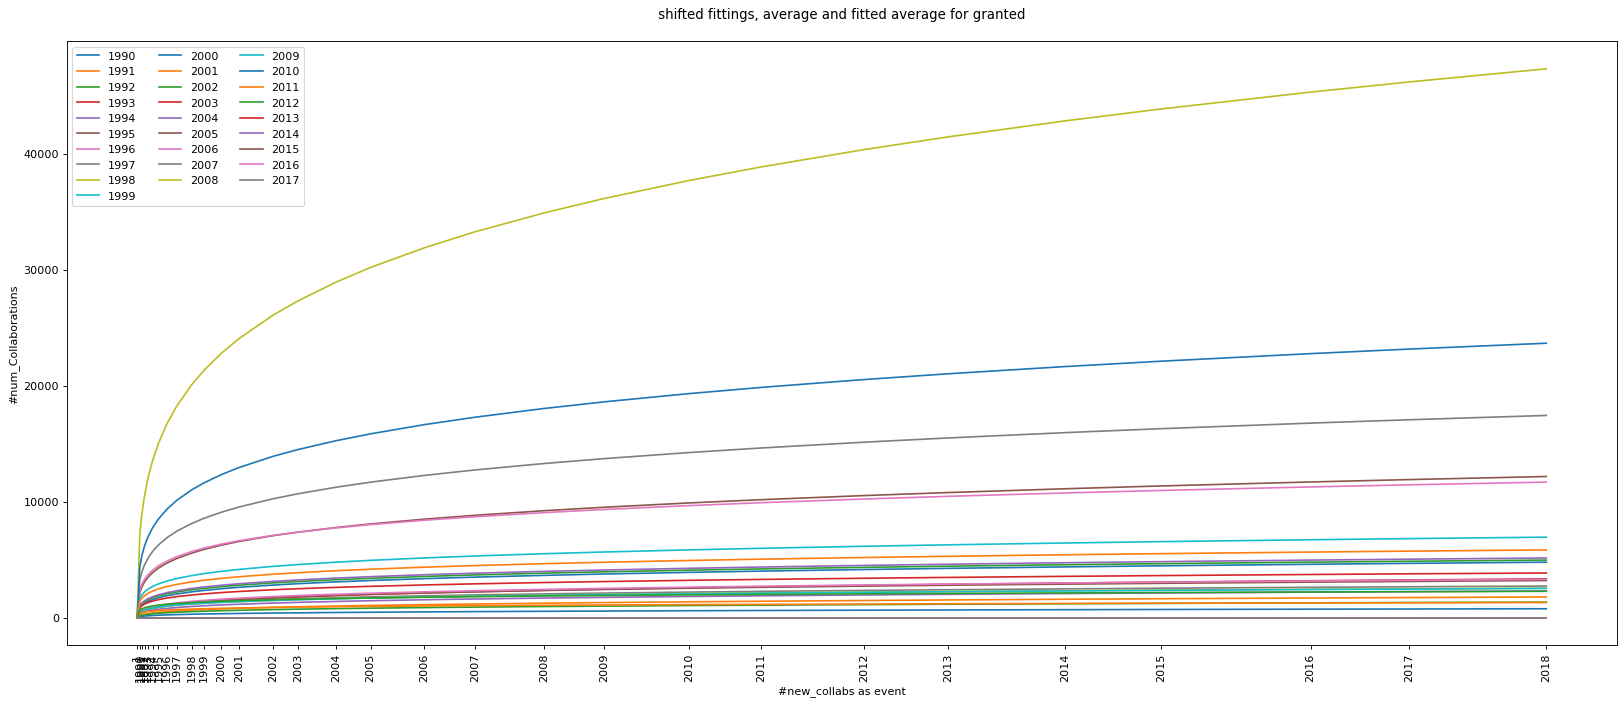

In [123]:
# Shift all fitted trajectories
granted_shifted_funcs = []
for i in range(len(granted_alphas)):
    
    events_plus1 = [1]
    for e in EVENTS:
        events_plus1.append(e)
        
    f = theoretical_func(events_plus1, granted_alphas[i], granted_betas[i], np.int64(1))
    #plt.plot(a, f)
    granted_shifted_funcs.append(f) # add function to the set
    
plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for granted \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS[:-1]:
    # if(start_y not in ["2008", "2010", "2007", "2006", "2005"]): # highest curves
    j = YEARS.index(start_y)
    plt.plot(events_plus1,granted_shifted_funcs[j], label=start_y)
    
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)

x_labels = get_str_years_event()
x_labels.insert(0,1)
plt.xticks(events_plus1, x_labels)
plt.show()


## (3.2) - Not Granted

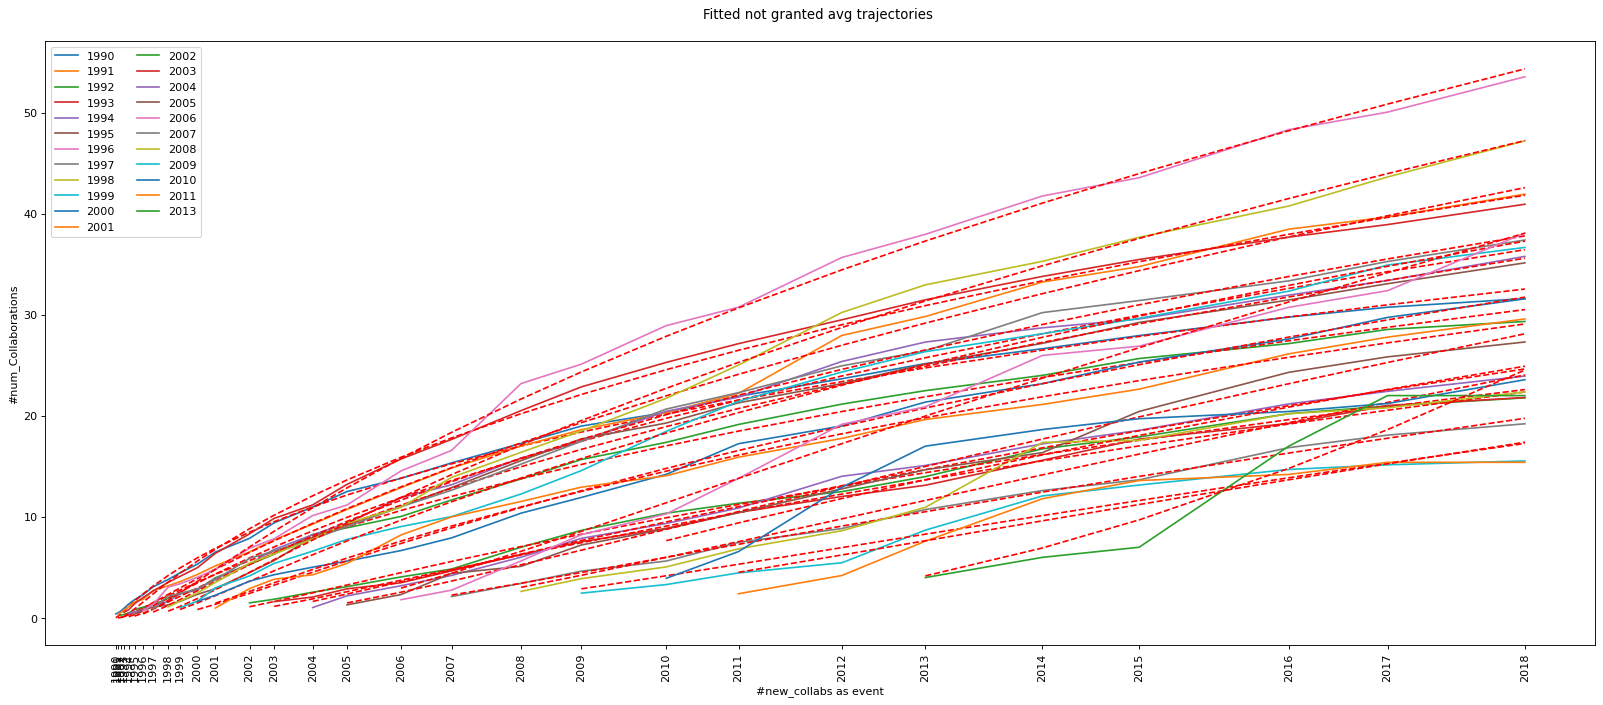

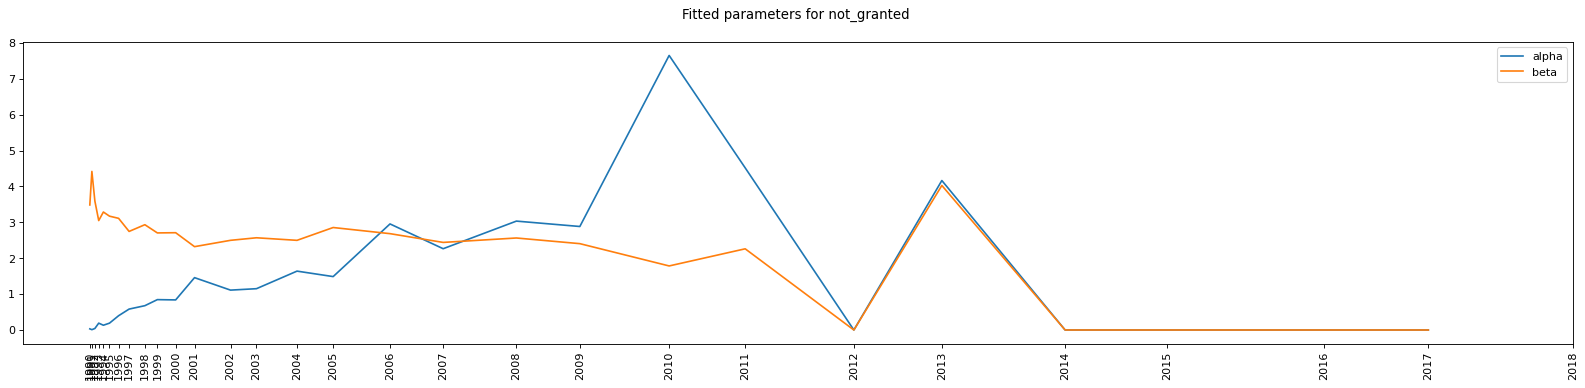

   start_y  not_granted_alpha  not_granted_betas
0     1990           0.031748           3.484615
1     1991           0.009246           4.418969
2     1992           0.042101           3.591946
3     1993           0.190956           3.049711
4     1994           0.132805           3.287711
5     1995           0.190895           3.172432
6     1996           0.397741           3.111994
7     1997           0.582746           2.747030
8     1998           0.677440           2.934283
9     1999           0.846323           2.705424
10    2000           0.838437           2.711178
11    2001           1.459005           2.322577
12    2002           1.111329           2.498965
13    2003           1.151042           2.569945
14    2004           1.640663           2.498692
15    2005           1.488383           2.855698
16    2006           2.955810           2.684801
17    2007           2.265203           2.440708
18    2008           3.034592           2.564003
19    2009          

In [133]:
## Plot fitted average trjectories for not granted
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted not granted avg trajectories \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

not_granted_alphas = []
not_granted_betas = []
for start_y in YEARS[:-1]:

    curr_x = EVENTS[YEARS.index(start_y)]  
    
    # get control's trajectories 
    x,y = get_controls_avg_trajectories(EVENTS, start_y)
    
    if(y != []):
        fit_y, alpha, beta = fit_trajectory(x, y, curr_x) # fit the real data above with the theoretical trajectory 
        
        plt.plot(x,y, label=str(start_y))
        plt.plot(x,fit_y, 'r--')
        
        plt.xticks(x, fit_y)
        plt.xticks(rotation='vertical')
    else:
        alpha = 0
        beta = 0
        
    # save fitted parameters alpha, beta
    not_granted_alphas.append(alpha)
    not_granted_betas.append(beta)
    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()


## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for not_granted \n", fontdict = {'fontsize' : 12})
plt.plot(EVENTS[:-1], not_granted_alphas, label="alpha")
plt.plot(EVENTS[:-1], not_granted_betas, label="beta")
plt.xticks(EVENTS, YEARS)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS[i], not_granted_alphas[i], not_granted_betas[i]] for i in range(len(not_granted_alphas)) if not_granted_alphas[i]!=0], columns=["start_y", "not_granted_alpha", "not_granted_betas"]))

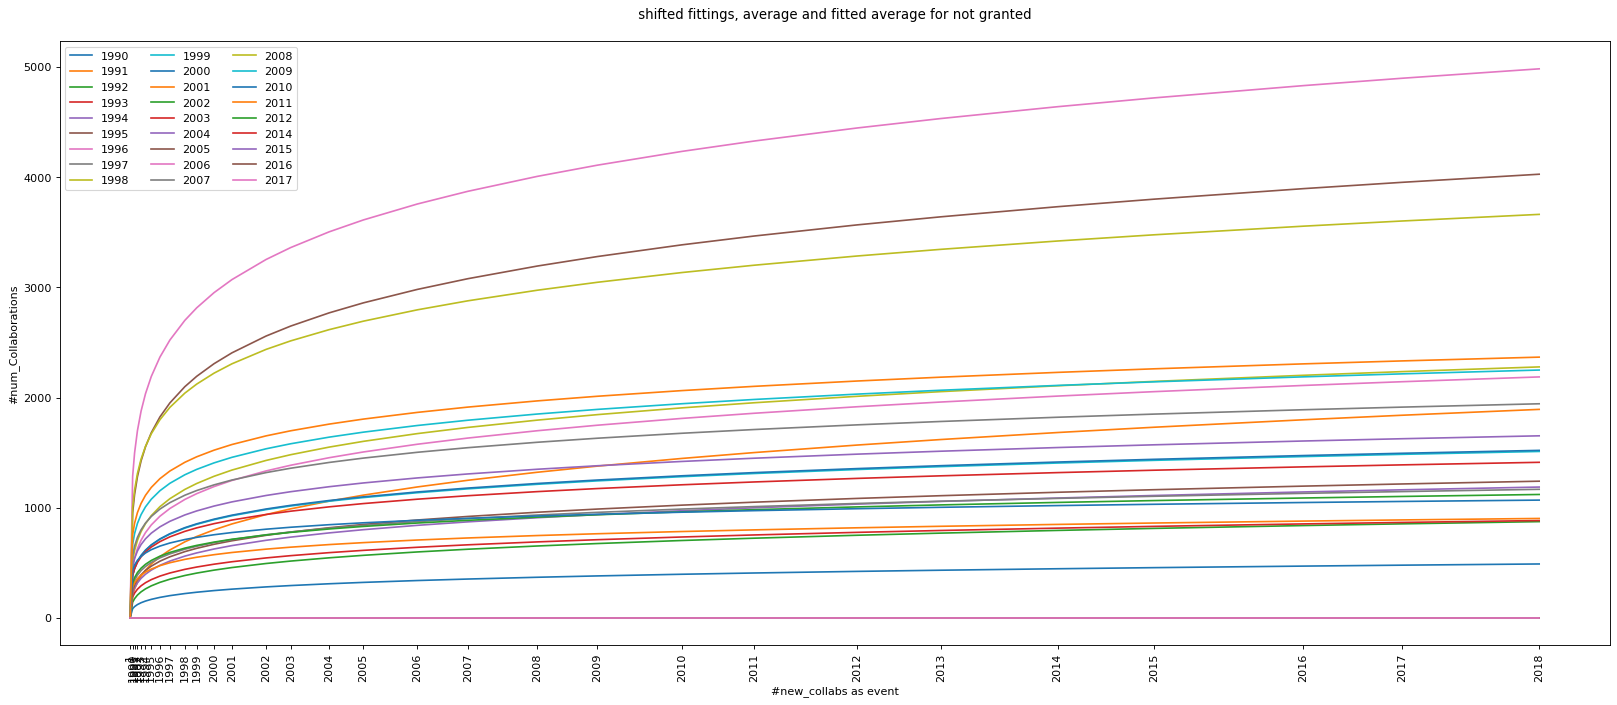

In [134]:
# Shift all fitted trajectories
not_granted_shifted_funcs = []
for i in range(len(not_granted_alphas)):
    
    events_plus1 = [1]
    for e in EVENTS:
        events_plus1.append(e)
        
    f = theoretical_func(events_plus1, not_granted_alphas[i], not_granted_betas[i], np.int64(1))
    #plt.plot(a, f)
    not_granted_shifted_funcs.append(f) # add function to the set
    
plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for not granted \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS[:-1]:
    if(start_y not in ["2013"]): # highest curves
        j = YEARS.index(start_y)
        plt.plot(events_plus1,not_granted_shifted_funcs[j], label=start_y)
    
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)

x_labels = get_str_years_event()
x_labels.insert(0,1)
plt.xticks(events_plus1, x_labels)
plt.show()


In [108]:
not_granted[not_granted["start_year"]==2013]

,group,focal,anr_year,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,start_year
auth.id,,,,,,,,,,,,,,,,,,,,,
55791277000,1212,0,2015,0,0,0,0,0,0,0,...,0,3,3,4,6,7,17,22,22,2013


# (4) **weighted AVERAGE over the shifted fittings**

In [148]:
## NOT GRANTED ##

# compute the average of the shifted functions
shift_not_granted_avg = [0 for i in range(len(EVENTS)+1)]

for start_y in YEARS[:-1]:
    start_y="2017"
    
    # if(start_y not in ["2008", "2010", "2007", "2006", "2005"]): # highest curves
    j = YEARS.index(start_y)
    control_avg = not_granted_shifted_funcs[j]
    num_control = len(not_granted[not_granted["start_year"]==int(start_y)])
    
    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(focal_avg)) :
        if(control_avg == []):
            shift_not_granted_avg[i] +=  0
        else:
            shift_not_granted_avg[i] += num_control*control_avg[i]  
                  
    print(start_y, control_avg, num_control, shift_not_granted_avg)
    break

# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)
for i in range(len(EVENTS)):
    shift_not_granted_avg[i] = shift_not_granted_avg[i]/d


## GRANTED ## 

# compute the average of the shifted functions
shift_granted_avg = [0 for i in range(len(EVENTS)+1)]

for start_y in YEARS[:-1]:
    # if(start_y not in ["2008", "2010", "2007", "2006", "2005"]): # highest curves
    j = YEARS.index(start_y)
    focal_avg = granted_shifted_funcs[j]
    num_focal = len(granted[granted["start_year"]==int(start_y)])
    
    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(focal_avg)) :
        if(focal_avg == []):
            shift_granted_avg[i] +=  0
        else:
            shift_granted_avg[i] += num_focal*focal_avg[i] 
        
# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)
for i in range(len(EVENTS)):
    shift_granted_avg[i] = shift_granted_avg[i]/d

2017 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/tmp/ipykernel_6496/1137336297.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(control_avg == []):
/tmp/ipykernel_6496/1137336297.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(focal_avg == []):


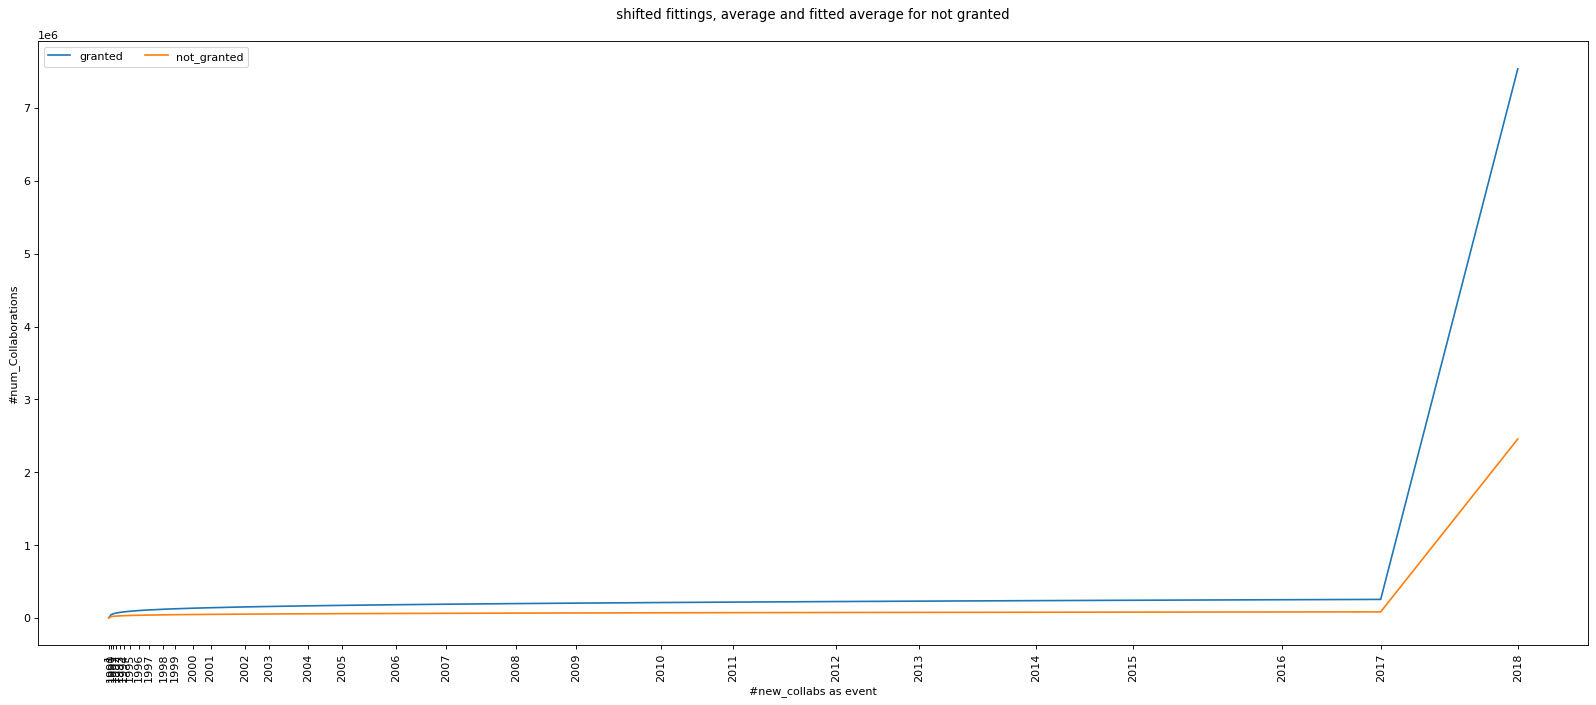

In [136]:
shift_granted_avg
shift_not_granted_avg

plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for not granted \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

plt.plot(events_plus1,shift_granted_avg, label="granted")    
plt.plot(events_plus1,shift_not_granted_avg, label="not_granted")

plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)

x_labels = get_str_years_event()
x_labels.insert(0,1)
plt.xticks(events_plus1, x_labels)
plt.show()

In [137]:
len(shift_granted_avg)

30